# Avacado Project

###### Batch - DS0422
###### Submitted by - Akash Shrivastava
***

#### Problem Statement

**Avocado is a fruit consumed by people heavily in the United States.**

**Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV.**

**The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.** 

**Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags.**

**The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.**

**Some relevant columns in the dataset:**

- **Date - The date of the observation**
- **AveragePrice - the average price of a single avocado**
- **type - conventional or organic**
- **year - the year**
- **Region - the city or region of the observation**
- **Total Volume - Total number of avocados sold**
- **4046 - Total number of avocados with PLU 4046 sold**
- **4225 - Total number of avocados with PLU 4225 sold**
- **4770 - Total number of avocados with PLU 4770 sold**


**Inspiration /Label**

**The dataset can be seen in two angles to find the region and find the average price .**

**Task: One of Classification and other of Regression**

**Do both tasks in the same .ipynb file and submit at single file.** 

**To download the dataset, use the link given below.** 

**Downlaod Files:***
**https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/avocado.csv.zip**
***

###### - Importing required libraries

In [1]:
import numpy as np  #---- for computation
import pandas as pd #---- for dataframe dependencies

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# for stats
from scipy import stats

# filtering warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing casestudy dataset (.csv file)
df=pd.read_csv('avocado.csv')

In [3]:
df

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0       48.16     8696.87     8603.62       93.25          0.0  conventional   
1       58.33     9505.56     9408.07       97.49          0.0  conventional   
2      130.50     8145.35     8042.21      103.14          0.0  conventional   
3       72.58     5811.16     5677.40      133.76          0.0  conventional   
4       75.78     6183.95     5986.26      197.69          0.0  conventional   
...       ...         ...         ...         ...          ...           ...   
18244    0.00    13498.67    13066.82      431.85          0.0       organic   
18245    0.00     9264.84     8940.04      324.80          0.0       organic   
18246  727.94     9394.11     9351.80       42.31          0.0       organic   
18247  727.01    10969.54    10919.54       50.00          0.0       organic   
18248  224.53    12014.15    11988.14       26.01          0.0       organic   

       year            region  
0      2015            Albany  
1      2015            Albany  
2      2015            Albany  
3      2015            Albany  
4      2015            Albany  
...     ...               ...  
18244  2018  WestTexNewMexico  
18245  2018  WestTexNewMexico  
18246  2018  WestTexNewMexico  
18247  2018  WestTexNewMexico  
18248  2018  WestTexNewMexico  

[18249 rows x 14 columns]

In [4]:
print('No. Of Rows -',df.shape[0])
print('No. Of Columns -',df.shape[1])

No. Of Rows - 18249
No. Of Columns - 14


In [5]:
df.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

In [6]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [7]:
df.drop(['Unnamed: 0'], axis=1 , inplace=True)

In [8]:
df.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0  2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1  2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2  2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3  2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4  2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany  
3     5811.16     5677.40      133.76          0.0  conventional  2015  Albany  
4     6183.95     5986.26      197.69          0.0  conventional  2015  Albany

**Earlier in info we observed that Date is Object type not the data type.We have to change its type to datatype.**

In [9]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

### Data Integrity Check
**Since dataset is large, let us check for any entry which is repeated or duplicated in dataset at same data.**

In [10]:
df.duplicated().sum()   #this will check the duplicate data for all columns.

0

##### Comment - Dataset does'nt contain any duplicate value.

### To Check Missing Values

In [11]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Month           0
Day             0
dtype: int64

<AxesSubplot:>

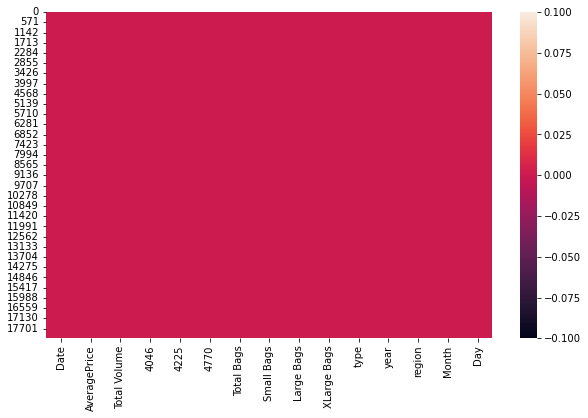

In [12]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())

In [13]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

              Missing Values  % Missing data
Date                       0             0.0
AveragePrice               0             0.0
Total Volume               0             0.0
4046                       0             0.0
4225                       0             0.0
4770                       0             0.0
Total Bags                 0             0.0
Small Bags                 0             0.0
Large Bags                 0             0.0
XLarge Bags                0             0.0
type                       0             0.0
year                       0             0.0
region                     0             0.0
Month                      0             0.0
Day                        0             0.0


##### Comment - There is no missing values in dataset

### Datatype Check

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
 13  Month         18249 non-null  int64         
 14  Day           18249 non-null  int64         
dtypes: datetime64[ns](1), float64(9), in

##### Comment -
- **There are 13 features in data.**
- **Region has object datatype.**
- **Date by default data type is object which need to change to datetime datatype.**
- **Other variable are float & int datatypes.**

**The above dataset have Nan values after 1510th.Now we will remove all the Nan columns**

**We will divide Date column into two categories which will help in our analysis**

### Checking Nan Values

In [15]:
df.isna().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Month           0
Day             0
dtype: int64

##### Comment - There is no Null values in the data .

### Statistical Analysis

<AxesSubplot:>

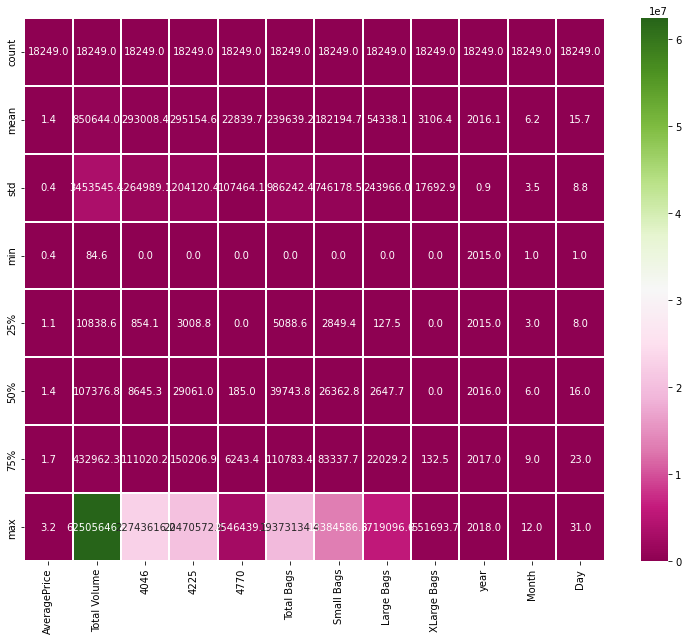

In [16]:
#visualization using heatmap
plt.figure(figsize=(13,10))
sns.heatmap(df.describe(),linewidths = 0.1, fmt= '0.1f',annot = True,cmap='PiYG')

In [17]:
df.describe().T.round(3)

count        mean          std      min       25%        50%  \
AveragePrice  18249.0       1.406        0.403     0.44      1.10       1.37   
Total Volume  18249.0  850644.013  3453545.355    84.56  10838.58  107376.76   
4046          18249.0  293008.425  1264989.082     0.00    854.07    8645.30   
4225          18249.0  295154.568  1204120.401     0.00   3008.78   29061.02   
4770          18249.0   22839.736   107464.068     0.00      0.00     184.99   
Total Bags    18249.0  239639.202   986242.399     0.00   5088.64   39743.83   
Small Bags    18249.0  182194.687   746178.515     0.00   2849.42   26362.82   
Large Bags    18249.0   54338.088   243965.965     0.00    127.47    2647.71   
XLarge Bags   18249.0    3106.427    17692.895     0.00      0.00       0.00   
year          18249.0    2016.148        0.940  2015.00   2015.00    2016.00   
Month         18249.0       6.177        3.534     1.00      3.00       6.00   
Day           18249.0      15.663        8.776     1.00      8.00      16.00   

                    75%          max  
AveragePrice       1.66         3.25  
Total Volume  432962.29  62505646.52  
4046          111020.20  22743616.17  
4225          150206.86  20470572.61  
4770            6243.42   2546439.11  
Total Bags    110783.37  19373134.37  
Small Bags     83337.67  13384586.80  
Large Bags     22029.25   5719096.61  
XLarge Bags      132.50    551693.65  
year            2017.00      2018.00  
Month              9.00        12.00  
Day               23.00        31.00

##### Comment -
- **We can observe tat some of the features contain outliers after looking at 50% and max columns.**
- **For most of the columns have minimum value of zero.**
- **Mean is greater than median for almost all columns i.e, data is right skewed.**
- **Std. deviation is greater than mean i.e, data is apread.**

In [18]:
print("\033[1m"+'Minimum Price of Avocado :'+"\033[0m",df.AveragePrice.min(),'USD')
print("\033[1m"+'Maximum Price of avacado :'+"\033[0m",df.AveragePrice.max(),'USD')
print("\033[1m"+'Average Price of avacado :'+"\033[0m",df.AveragePrice.mean(),'USD')

Minimum Price of Avocado : 0.44 USD
Maximum Price of avacado : 3.25 USD
Average Price of avacado : 1.4059784097758825 USD


## Data Visualisation

<AxesSubplot:title={'center':'Distribution Price'}, xlabel='AveragePrice', ylabel='Density'>

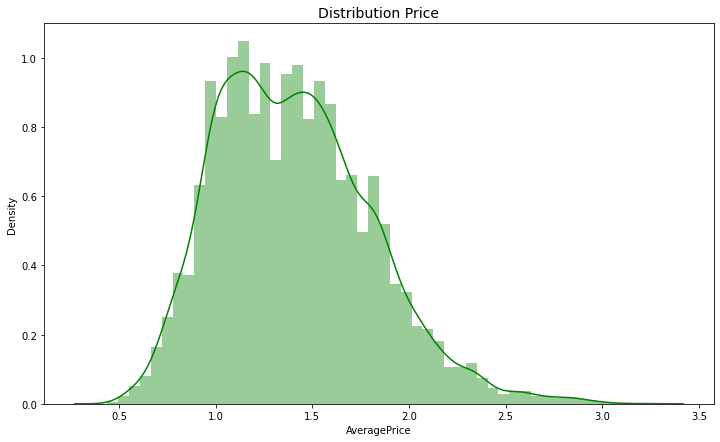

In [19]:
plt.figure(figsize=[12,7])
plt.title("Distribution Price",fontsize = 14)
sns.distplot(df['AveragePrice'], color='g')

###### Average Price distribution shows that for most cases price of avocado is between 1.1, 1.4

In [20]:
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [21]:
df.groupby('type')['AveragePrice'].mean()

type
conventional    1.158040
organic         1.653999
Name: AveragePrice, dtype: float64

In [22]:
print("\033[1m"+'Percentage difference in price of avacado :'+"\033[0m",((1.65399-1.1580)/1.1580)*100,"%")

Percentage difference in price of avacado : 42.831606217616596 %


<AxesSubplot:xlabel='AveragePrice', ylabel='type'>

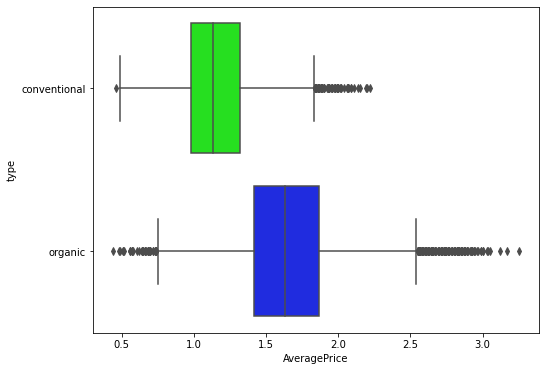

In [23]:
plt.figure(figsize=(8,6))
sns.boxplot(y="type", x="AveragePrice", data=df, palette = 'hsv')

##### Comment-
- **over 2% of our dataset is organic.**
- **organic avocado is almost 43% more costlier than conventional Avocado.**
- **conventional avocado is more in demand.**

###### Let us understand the difference between organic and conventional avocado-
- ###### Organic vs Conventional : The main difference between organic and conventional food products are the chemicals involved during production and processing. The interest in organic food products has been rising steadily over the recent years with new health super fruits emerging. Let's see if this is also the case with our dataset

### Checking Volumetric Sell Of Avocado

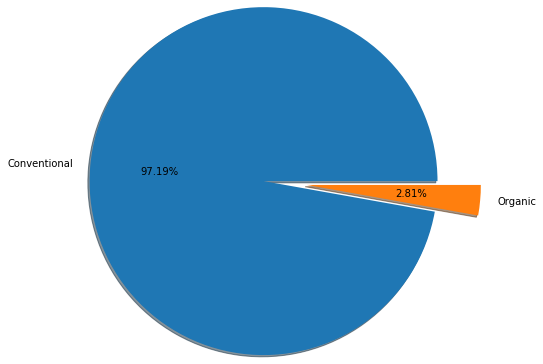

In [24]:
labels = 'Conventional','Organic',
fig, ax = plt.subplots()
ax.pie(df.groupby('type')['Total Volume'].mean(),labels = labels,radius =2,autopct = '%2.2f%%',explode=[0.3,0.2], shadow=True,)
plt.show()

In [25]:
df.groupby('type')['Total Volume'].mean()

type
conventional    1.653213e+06
organic         4.781121e+04
Name: Total Volume, dtype: float64

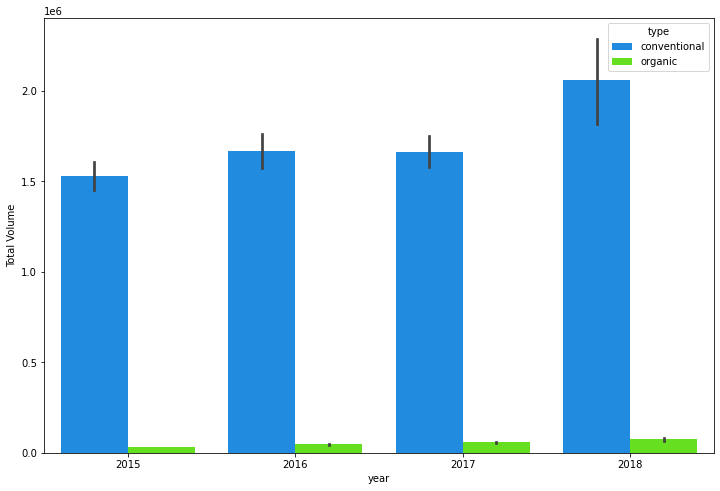

In [26]:
plt.figure(figsize=(12,8))
sns.barplot(x='year' ,y='Total Volume', hue='type', data=df ,palette='gist_rainbow_r',ci=68)
plt.show()

##### Comment - From previous observations we figured out that the demand of convntional avocado is more and the sale of organic avocado is upto 2%. **Barplot comfirms same thing in yearwise sales volume.**  
**The average price varies over year and season .**

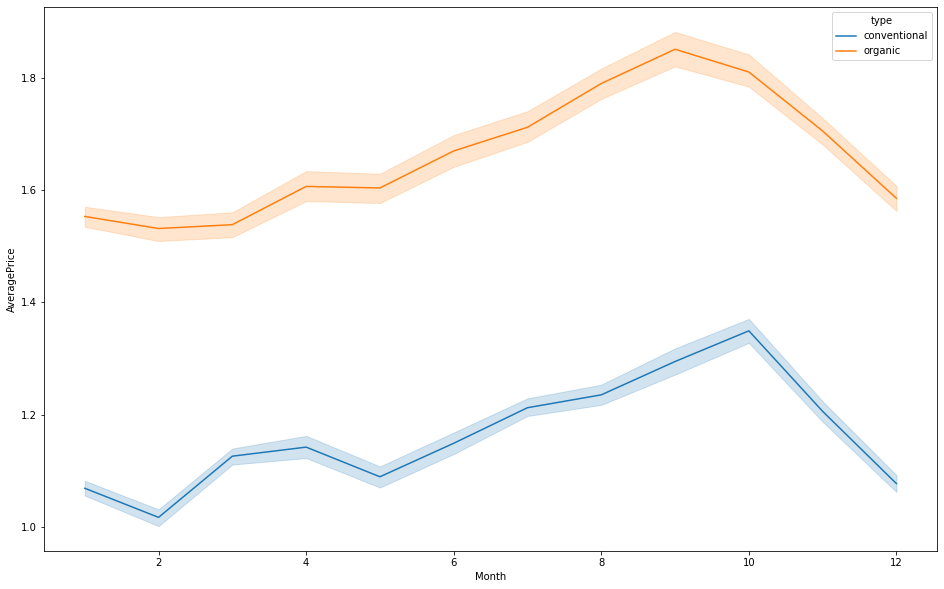

In [27]:
plt.figure(figsize=(16,10))
sns.lineplot(x='Month' ,y='AveragePrice', hue='type', data=df)
plt.show()

##### Comment -  We obseved that there was hike between months 8-10 for both conventional and organic type .

In [28]:
df.sort_values(by=['Date'], inplace=True, ascending=True)

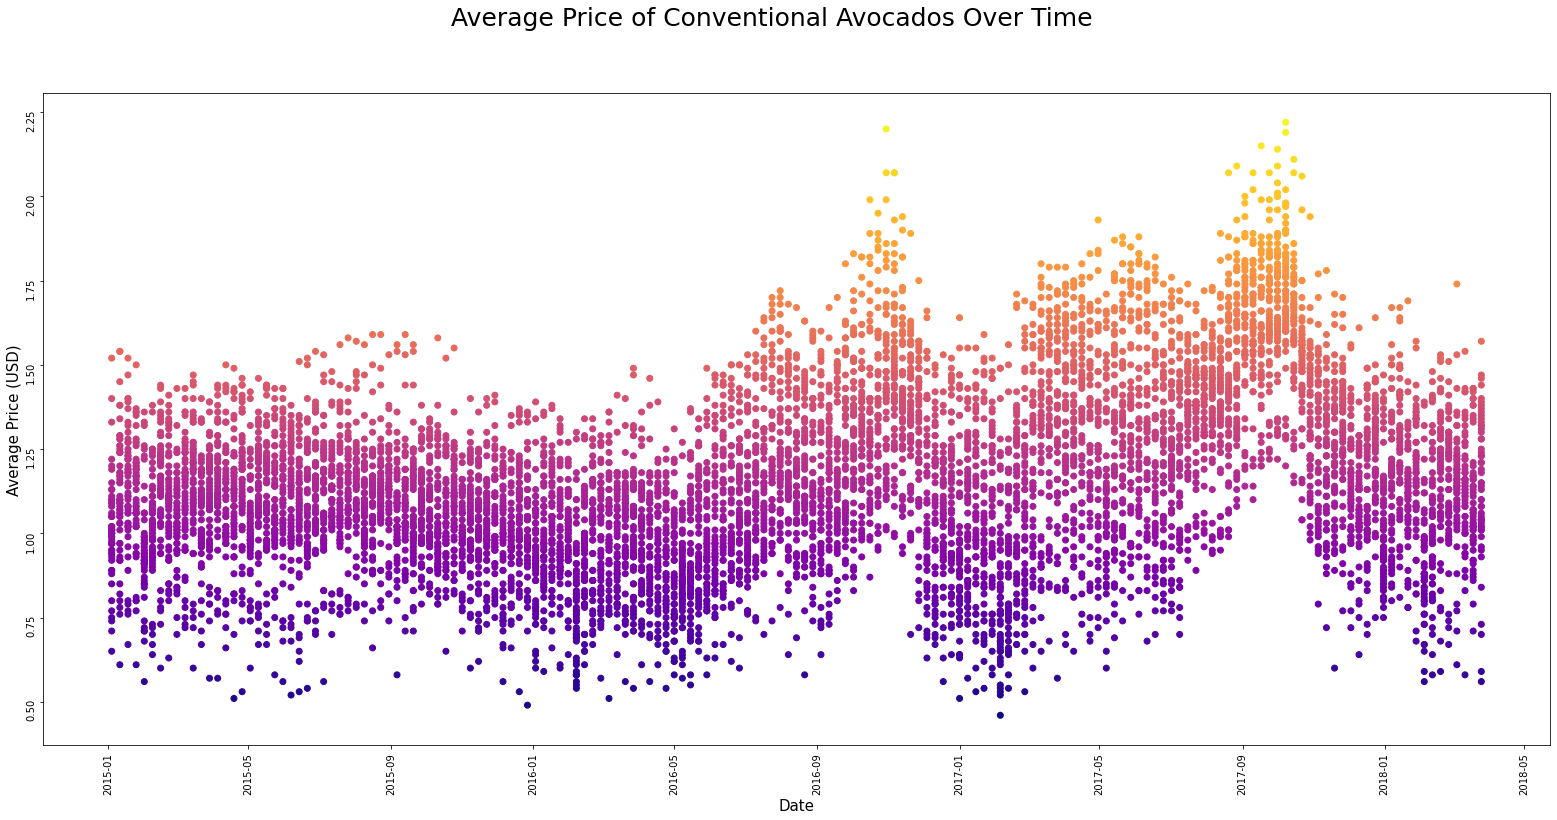

In [29]:
# Average price of Conventional Avocados over time

mask = df['type']== 'conventional'
plt.rc('figure', titlesize=20)
fig = plt.figure(figsize = (27, 12))
fig.suptitle('Average Price of Conventional Avocados Over Time', fontsize=25)
ax = fig.add_subplot(111)

dates = df[mask]['Date'].tolist()
avgPrices = df[mask]['AveragePrice'].tolist()

plt.scatter( dates,avgPrices, c=avgPrices, cmap='plasma')
ax.set_xlabel('Date',fontsize = 15,)
ax.set_ylabel('Average Price (USD)', fontsize = 15)
ax.set_xlim()
ax.tick_params(labelrotation=90)

plt.show()

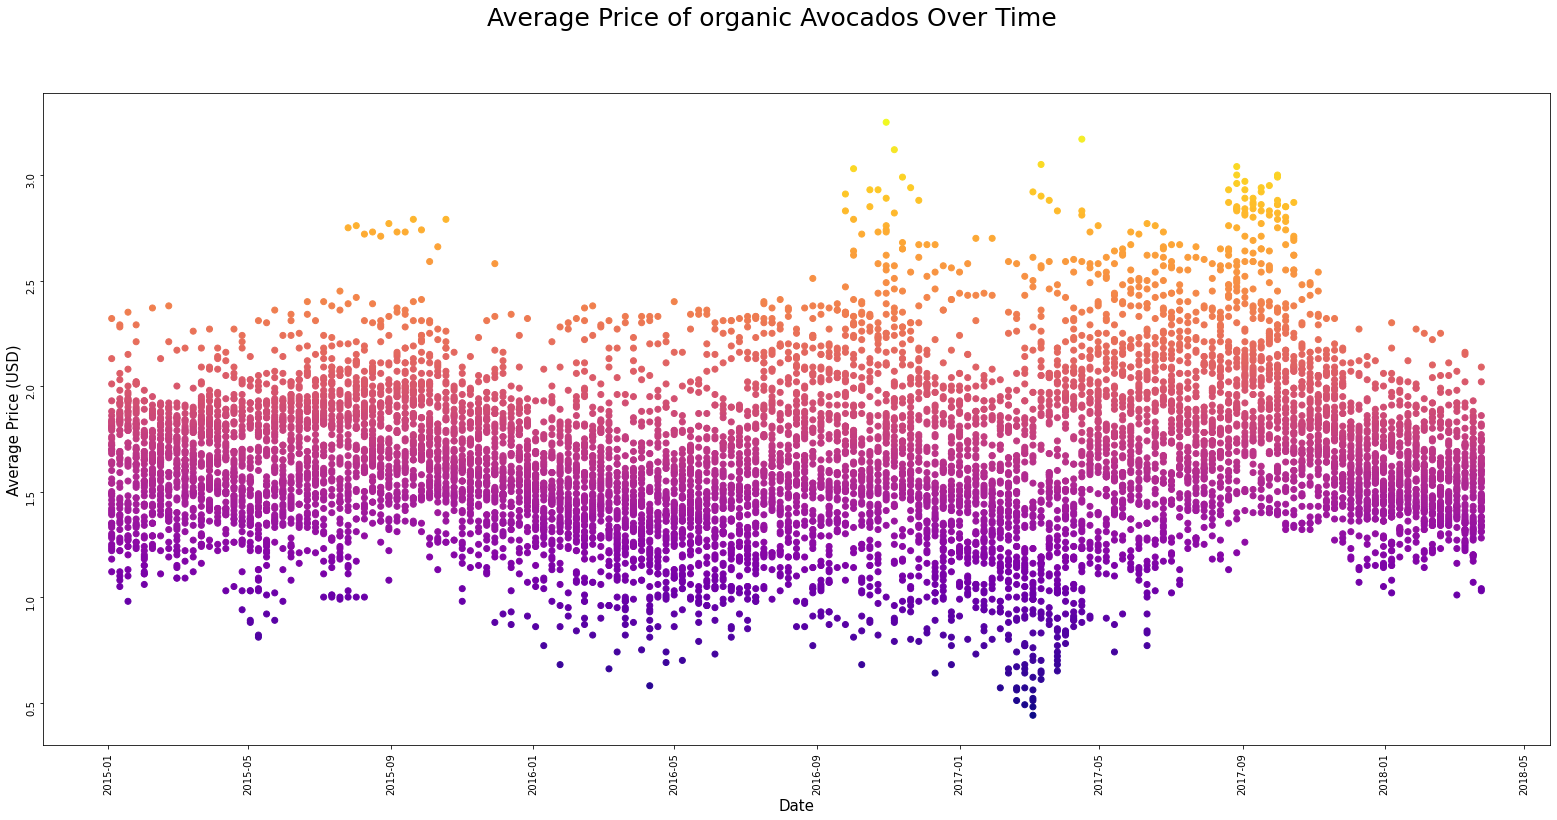

In [30]:
# Average price of Organuc Avocados over time

mask = df['type']== 'organic'
plt.rc('figure', titlesize=20)
fig = plt.figure(figsize = (27, 12))
fig.suptitle('Average Price of organic Avocados Over Time', fontsize=25)
ax = fig.add_subplot(111)

dates = df[mask]['Date'].tolist()
avgPrices = df[mask]['AveragePrice'].tolist()

plt.scatter( dates,avgPrices, c=avgPrices, cmap='plasma')
ax.set_xlabel('Date',fontsize = 15,)
ax.set_ylabel('Average Price (USD)', fontsize = 15)
ax.set_xlim()
ax.tick_params(labelrotation=90)

plt.show()

In [31]:
df.groupby(['region'])['Total Volume','AveragePrice'].agg([sum])

Total Volume AveragePrice
                              sum          sum
region                                        
Albany               1.606780e+07       527.63
Atlanta              8.860512e+07       452.23
BaltimoreWashington  1.347139e+08       518.57
Boise                1.441319e+07       455.67
Boston               9.727398e+07       517.44
BuffaloRochester     2.296247e+07       512.69
California           1.028982e+09       471.62
Charlotte            3.555554e+07       542.84
Chicago              1.337023e+08       526.19
CincinnatiDayton     4.452201e+07       408.71
Columbus             2.999336e+07       423.44
DallasFtWorth        2.084193e+08       366.93
Denver               1.389025e+08       411.88
Detroit              6.342242e+07       431.32
GrandRapids          3.021174e+07       508.69
GreatLakes           5.896425e+08       452.43
HarrisburgScranton   4.180886e+07       511.49
HartfordSpringfield  5.067054e+07       614.70
Houston              2.031679e+08       354.20
Indianapolis         3.026339e+07       444.13
Jacksonville         2.879000e+07       510.70
LasVegas             5.437691e+07       466.75
LosAngeles           5.078965e+08       411.01
Louisville           1.609700e+07       434.90
MiamiFtLauderdale    9.767322e+07       482.83
Midsouth             5.083494e+08       474.81
Nashville            3.561209e+07       409.69
NewOrleansMobile     4.569514e+07       441.02
NewYork              2.407341e+08       583.92
Northeast            7.132809e+08       541.45
NorthernNewEngland   7.153289e+07       499.36
Orlando              5.866070e+07       509.10
Philadelphia         7.183880e+07       551.66
PhoenixTucson        1.956433e+08       413.86
Pittsburgh           1.880635e+07       461.14
Plains               3.111885e+08       485.54
Portland             1.105522e+08       445.39
RaleighGreensboro    4.820273e+07       525.63
RichmondNorfolk      4.223085e+07       436.47
Roanoke              2.504201e+07       421.80
Sacramento           7.516375e+07       548.09
SanDiego             8.979192e+07       472.58
SanFrancisco         1.358302e+08       609.82
Seattle              1.092142e+08       487.59
SouthCarolina        6.075377e+07       474.31
SouthCentral         1.011280e+09       372.22
Southeast            6.152384e+08       472.53
Spokane              1.556528e+07       488.61
StLouis              3.207283e+07       483.55
Syracuse             1.094267e+07       513.87
Tampa                6.600454e+07       476.19
TotalUS              5.864740e+09       445.83
West                 1.086779e+09       430.01
WestTexNewMexico     1.445218e+08       422.67

## EDA

#### Average Price Distribution Based on Region

Text(0.5, 1.0, 'Average Price of Avocado According to Region')

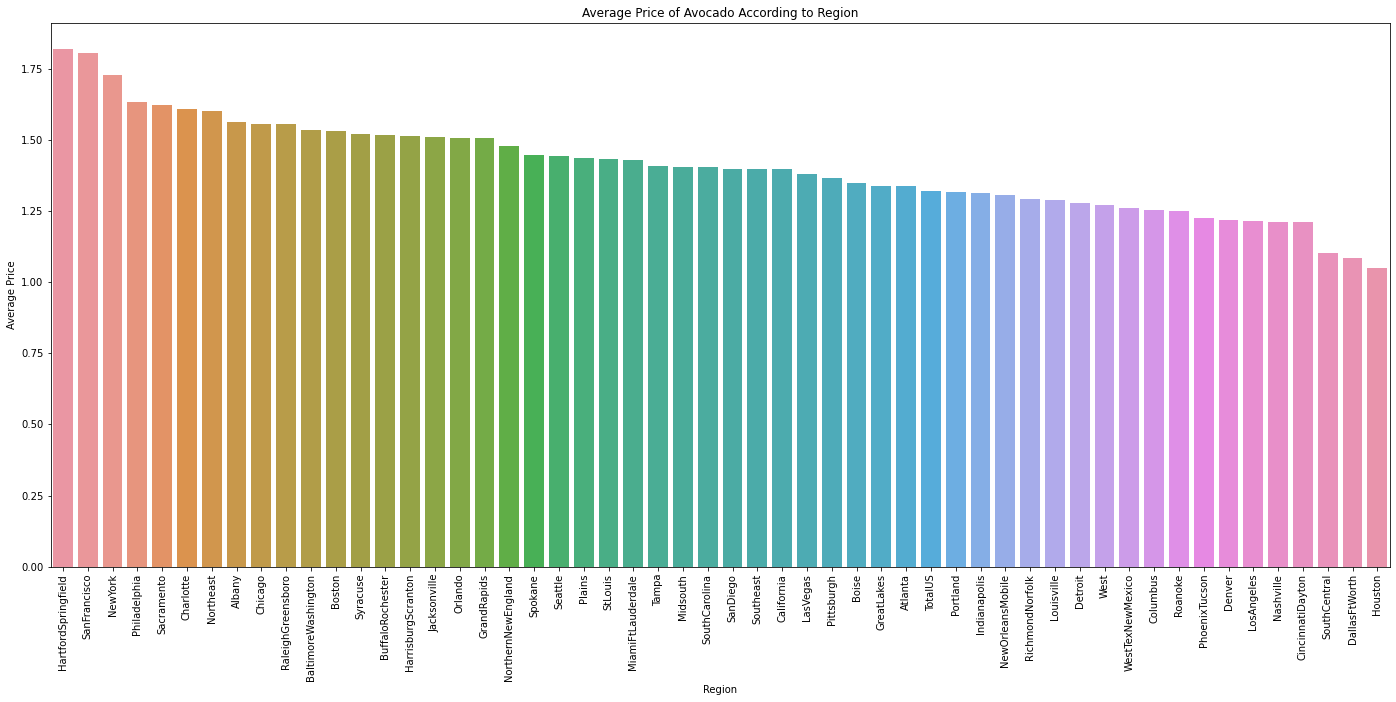

In [32]:
region_list=list(df.region.unique())
average_price=[]

for i in region_list:
    x=df[df.region==i]
    region_average=sum(x.AveragePrice)/len(x)
    average_price.append(region_average)

ds=pd.DataFrame({'region_list':region_list,'average_price':average_price})
new_index=ds.average_price.sort_values(ascending=False).index.values
sorted_data=ds.reindex(new_index)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=sorted_data.region_list,y=sorted_data.average_price)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

##### Comment - According to above barplot following region prices were high :-
- **HartfordSpringfield**
- **SanFrancisco**
- **NewYork**
- **Philadelphia**
- **Sacramento**

Text(0.5, 1.0, 'Average of Total Volume According to Region')

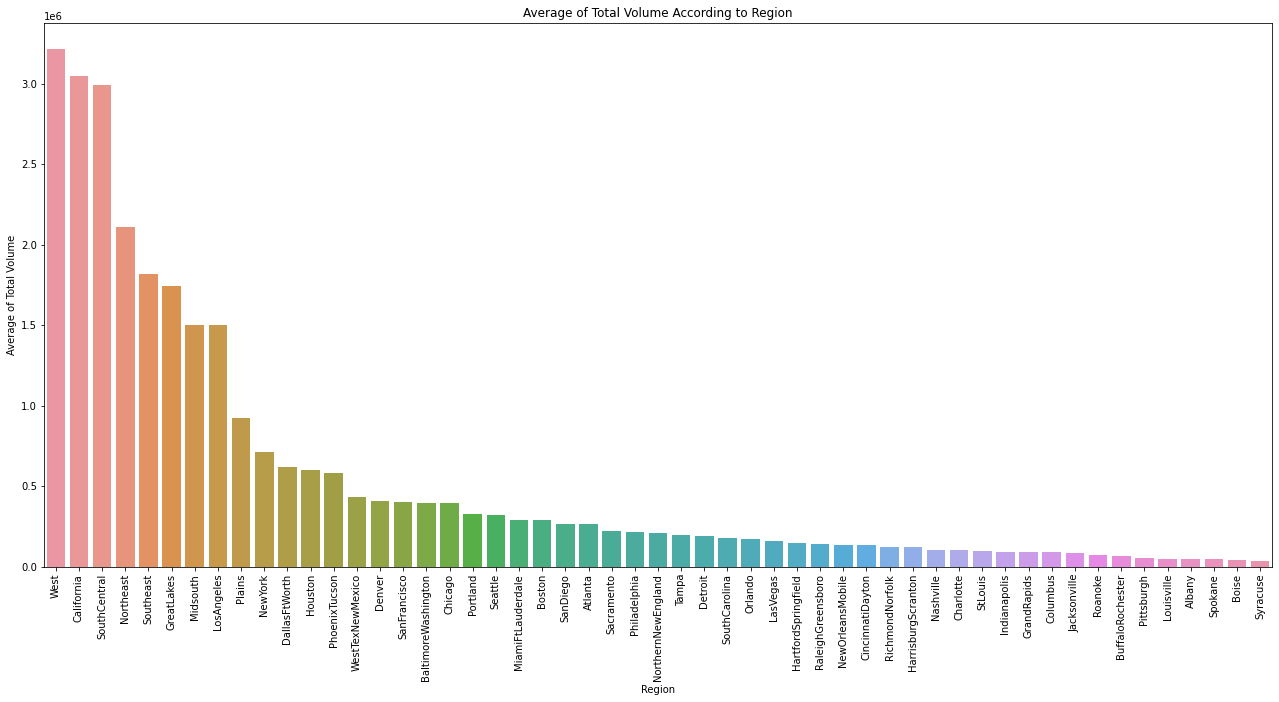

In [33]:
filter1=df.region!='TotalUS'
ds=df[filter1]

region_list=list(ds.region.unique())
average_total_volume=[]

for i in region_list:
    x=ds[ds.region==i]
    average_total_volume.append(sum(x['Total Volume'])/len(x))
da=pd.DataFrame({'region_list':region_list,'average_total_volume':average_total_volume})

new_index=da.average_total_volume.sort_values(ascending=False).index.values
sorted_data1=da.reindex(new_index)

plt.figure(figsize=(22,10))
ax=sns.barplot(x=sorted_data1.region_list,y=sorted_data1.average_total_volume)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average of Total Volume')
plt.title('Average of Total Volume According to Region')

###### Comment - According to above barplot following region are where Comsumption is very high :-
- **West**
- **California**
- **SouthCentral**
- **Northeast**
- **Southeast**

#### Highest AveragePrice in which year and for which region

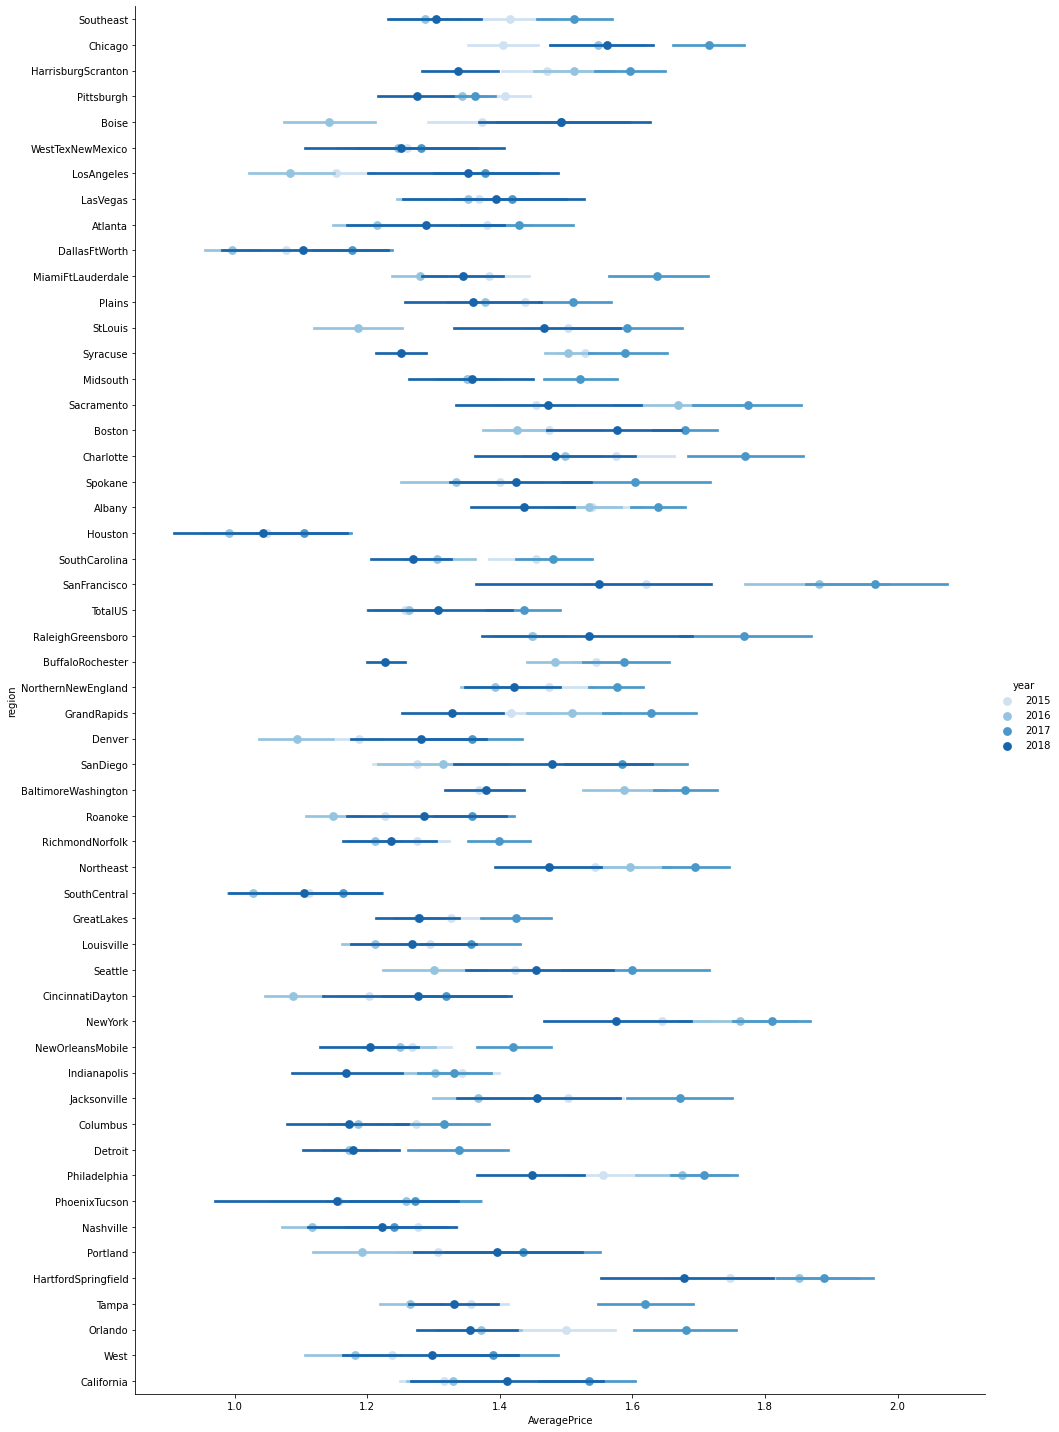

In [34]:
q = sns.factorplot('AveragePrice','region',data=df,
                  hue='year',
                  size=20,
                  aspect=0.7,
                  palette='Blues',
                  join=False,
                  )

##### Comment - We can observe that there was a huge increase in avocado prices as the demand increased in Year 2017 in SanFrancisco region.

#### Price distribution over date column

Text(0.5, 1.0, 'Average Price')

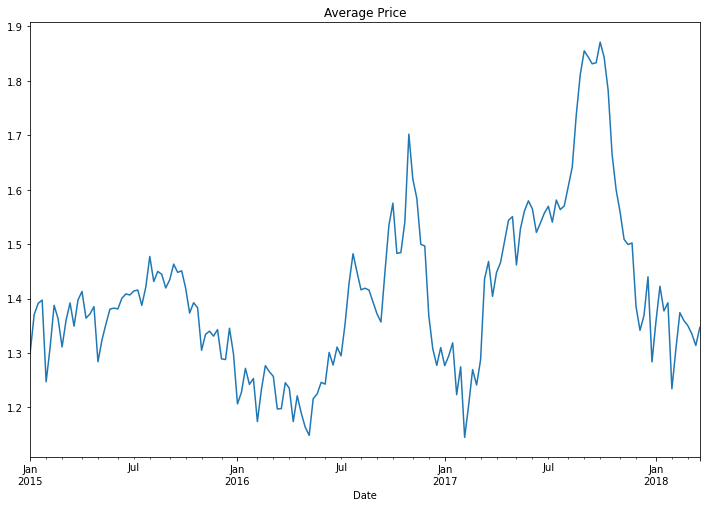

In [35]:
byDate=df.groupby('Date').mean()
plt.figure(figsize=(12,8))
byDate['AveragePrice'].plot()
plt.title('Average Price')

In [36]:
df.head()

Date  AveragePrice  Total Volume     4046      4225     4770  \
11569 2015-01-04          1.75      27365.89  9307.34   3844.81   615.28   
9593  2015-01-04          1.49      17723.17  1189.35  15628.27     0.00   
10009 2015-01-04          1.68       2896.72   161.68    206.96     0.00   
1819  2015-01-04          1.52      54956.80  3013.04  35456.88  1561.70   
9333  2015-01-04          1.64       1505.12     1.27   1129.50     0.00   

       Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
11569    13598.46    13061.10      537.36          0.0       organic  2015   
9593       905.55      905.55        0.00          0.0       organic  2015   
10009     2528.08     2528.08        0.00          0.0       organic  2015   
1819     14925.18    11264.80     3660.38          0.0  conventional  2015   
9333       374.35      186.67      187.68          0.0       organic  2015   

                   region  Month  Day  
11569           Southeast      1    4  
9593              Chicago      1    4  
10009  HarrisburgScranton      1    4  
1819           Pittsburgh      1    4  
9333                Boise      1    4

In [37]:
df2=df.copy()

In [38]:
#creating DataFrame for Numeric Features
df2.drop(['Date','type','region','year'],axis=1 , inplace=True)

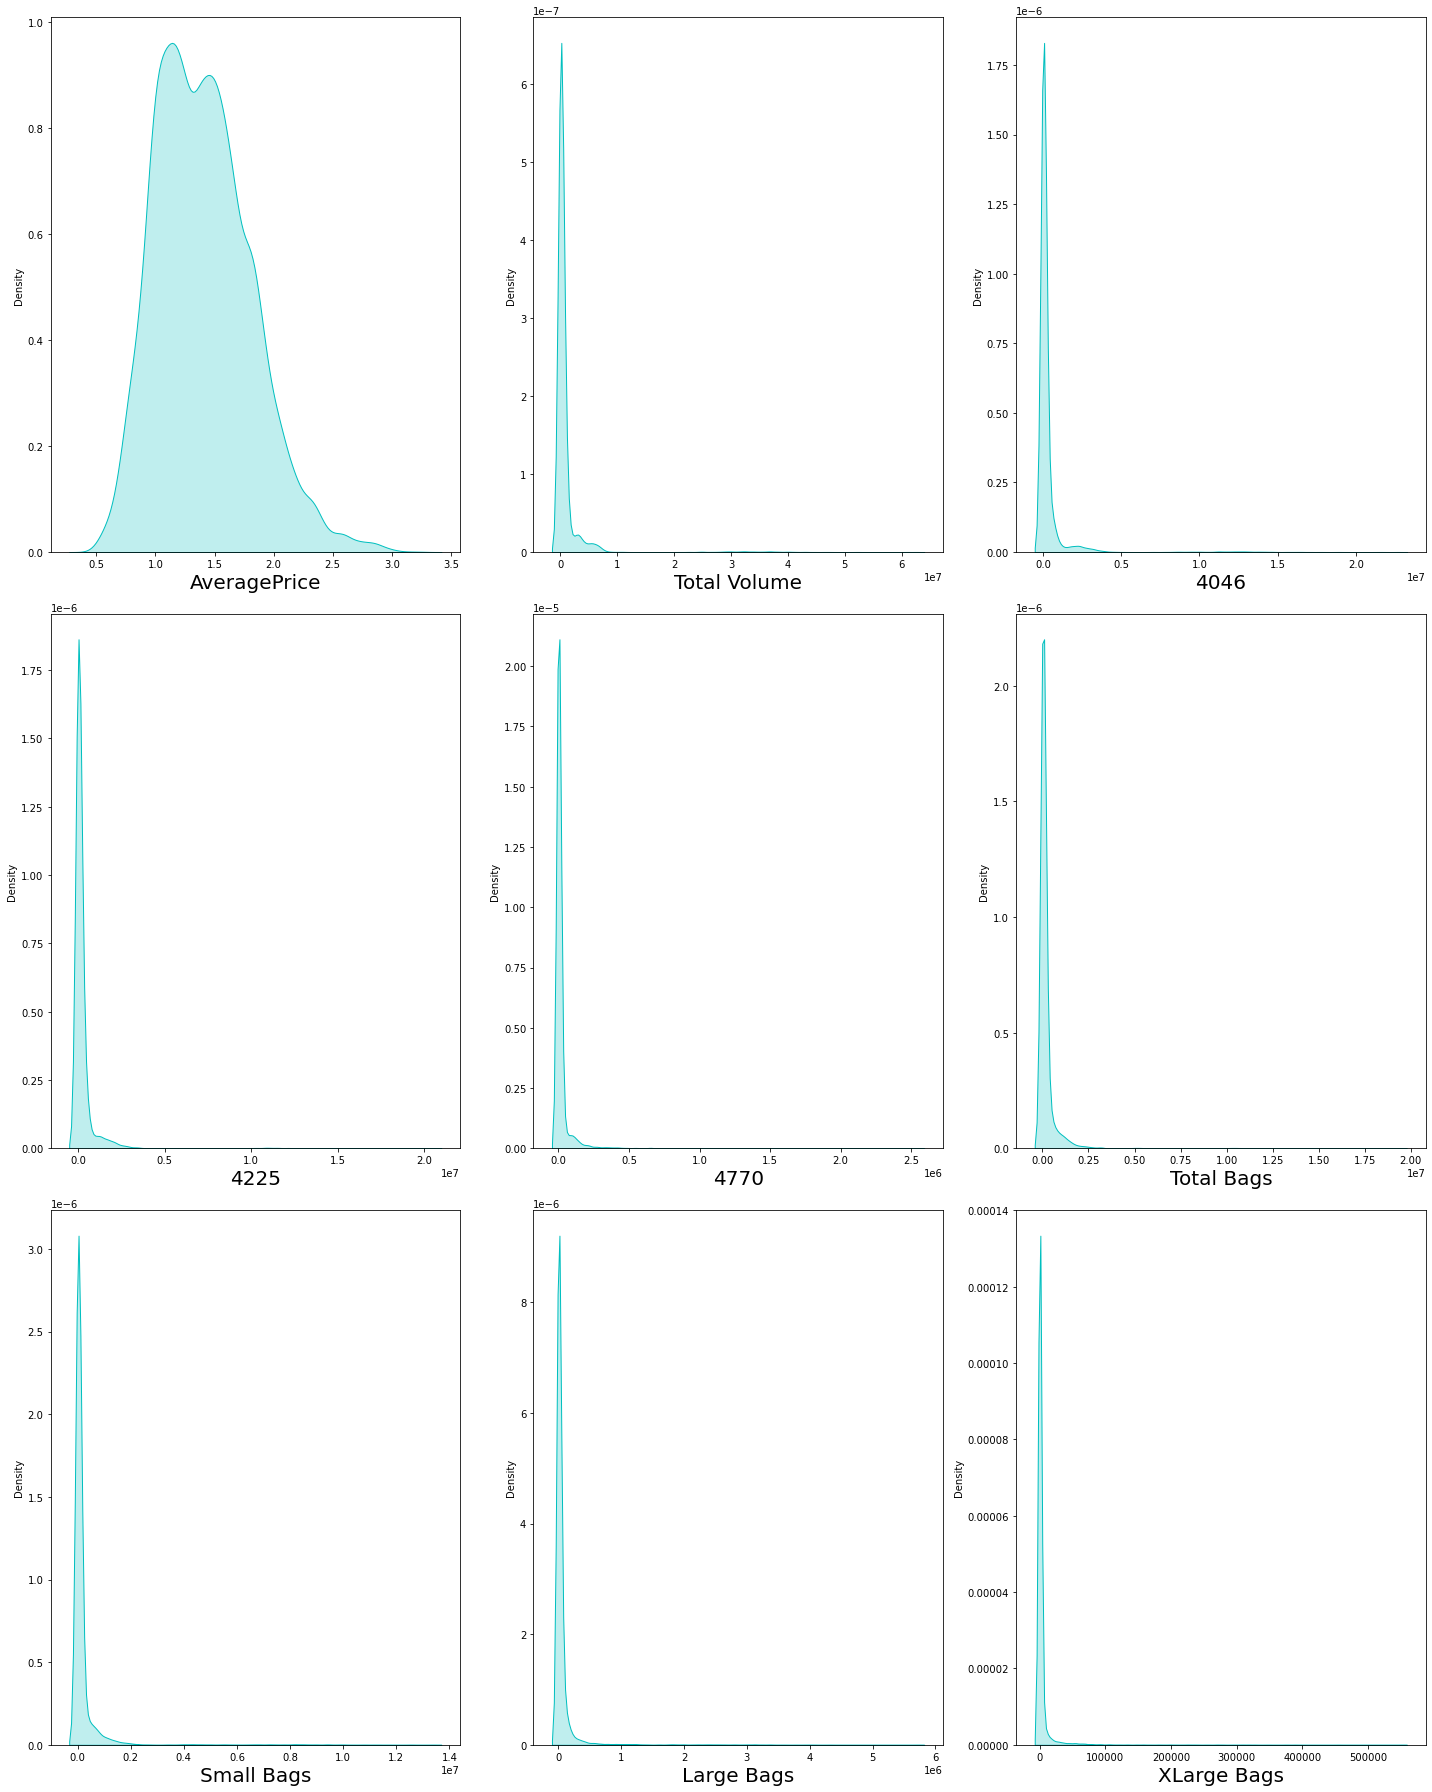

In [39]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber =1
for column in df2:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df2[column], color='c',hist=False, kde_kws={'shade':True})
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

##### Comment - 
- **We can observe that data is skewed with presence of outliers with sharp peak.**
- **Most of the plots are right skewed,having value of mean very small as compared to std.deviation and median. This results in sharp high peak.**
- **Very few datapoinnts are present as we move away from zero to other end of x-axis**

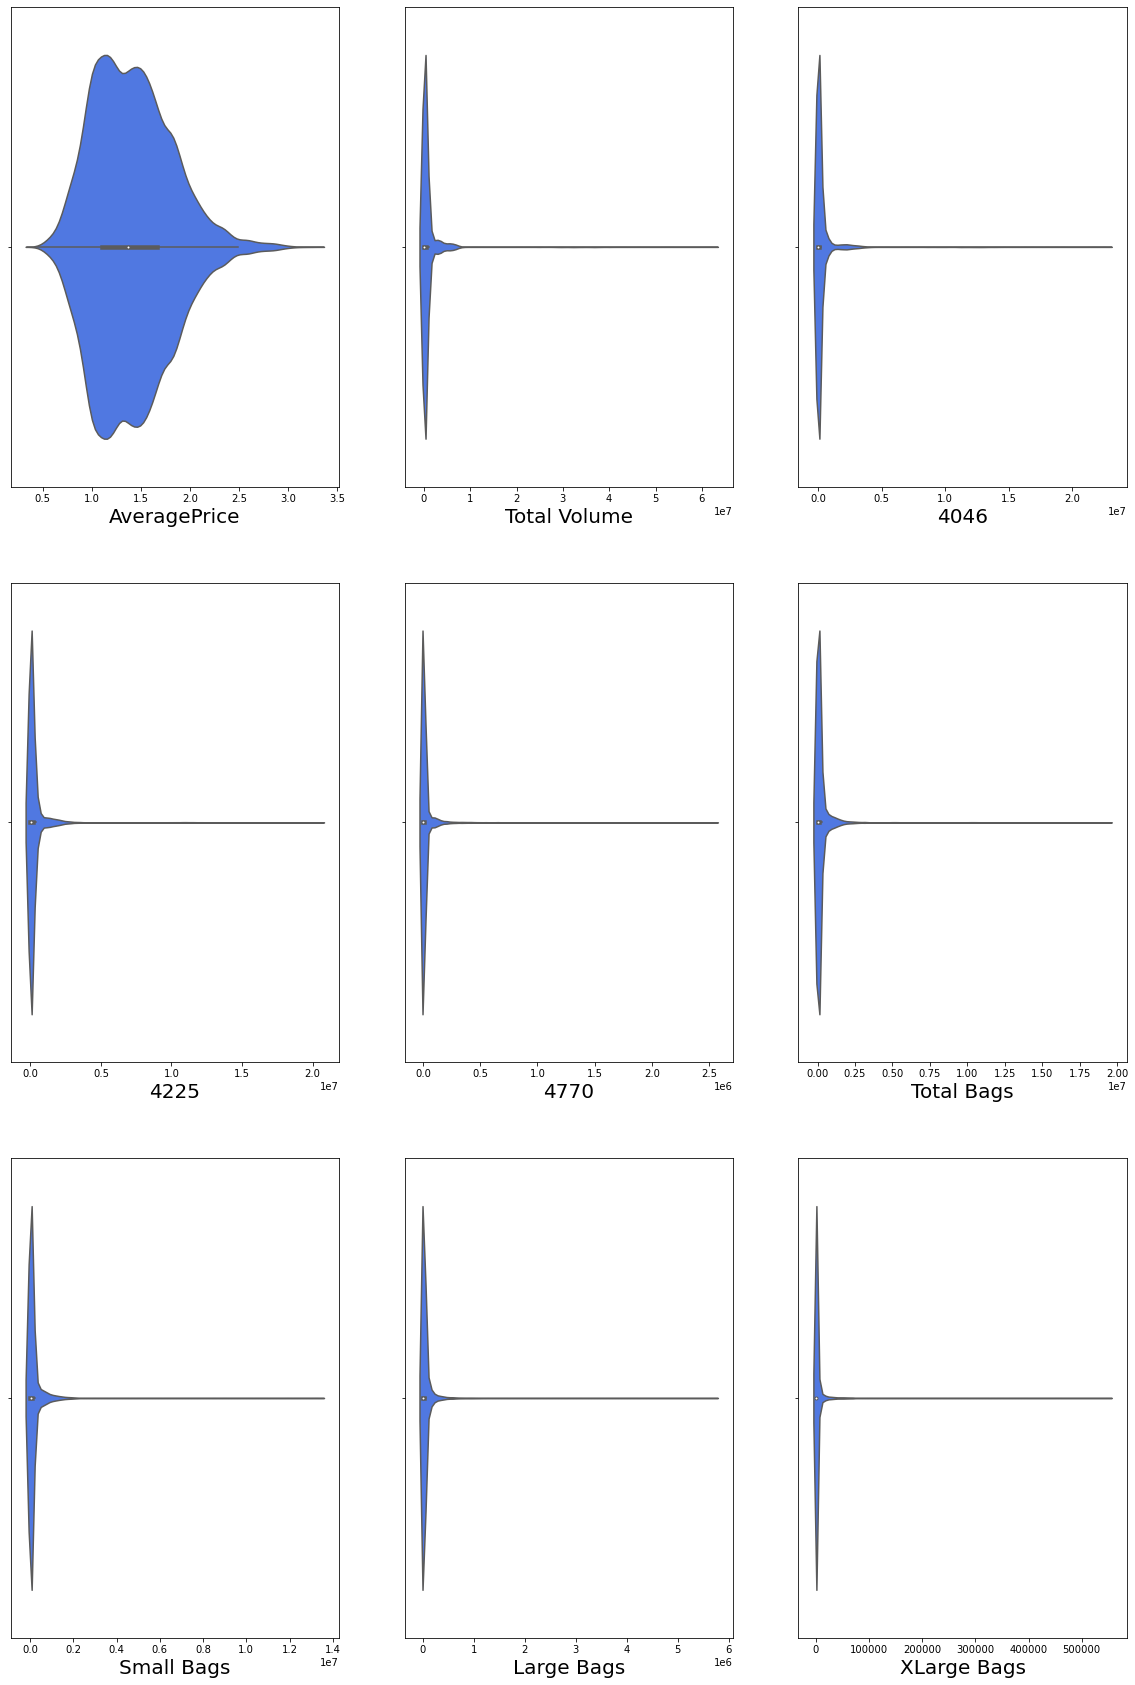

In [40]:
sns.set_palette('rainbow')
plt.figure(figsize=(20,30), facecolor='white')
plotnumber =1
for column in df2:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.violinplot(df2[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

##### Comment -For majority average price is in range of 1 to 1.5

##### Availability of avocado and price also vary over the year according to seasonal changes. Let us check the variation average price and sales volume over each month.

##### *For the purpose of investigating average price an sales due to seasonal changes let's create another copy of Data Frame*

In [41]:
df=pd.read_csv('avocado.csv')

In [42]:
#copy of original dataframe
df3=df.copy()

In [43]:
df3['Year'], df3['Month'], df3['Day'] = df3['Date'].str.split('-').str
df3.drop(columns=['Date','year'], inplace=True)
df3

Unnamed: 0  AveragePrice  Total Volume     4046       4225    4770  \
0               0          1.33      64236.62  1036.74   54454.85   48.16   
1               1          1.35      54876.98   674.28   44638.81   58.33   
2               2          0.93     118220.22   794.70  109149.67  130.50   
3               3          1.08      78992.15  1132.00   71976.41   72.58   
4               4          1.28      51039.60   941.48   43838.39   75.78   
...           ...           ...           ...      ...        ...     ...   
18244           7          1.63      17074.83  2046.96    1529.20    0.00   
18245           8          1.71      13888.04  1191.70    3431.50    0.00   
18246           9          1.87      13766.76  1191.92    2452.79  727.94   
18247          10          1.93      16205.22  1527.63    2981.04  727.01   
18248          11          1.62      17489.58  2894.77    2356.13  224.53   

       Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0         8696.87     8603.62       93.25          0.0  conventional   
1         9505.56     9408.07       97.49          0.0  conventional   
2         8145.35     8042.21      103.14          0.0  conventional   
3         5811.16     5677.40      133.76          0.0  conventional   
4         6183.95     5986.26      197.69          0.0  conventional   
...           ...         ...         ...          ...           ...   
18244    13498.67    13066.82      431.85          0.0       organic   
18245     9264.84     8940.04      324.80          0.0       organic   
18246     9394.11     9351.80       42.31          0.0       organic   
18247    10969.54    10919.54       50.00          0.0       organic   
18248    12014.15    11988.14       26.01          0.0       organic   

                 region  Year Month Day  
0                Albany  2015    12  27  
1                Albany  2015    12  20  
2                Albany  2015    12  13  
3                Albany  2015    12  06  
4                Albany  2015    11  29  
...                 ...   ...   ...  ..  
18244  WestTexNewMexico  2018    02  04  
18245  WestTexNewMexico  2018    01  28  
18246  WestTexNewMexico  2018    01  21  
18247  WestTexNewMexico  2018    01  14  
18248  WestTexNewMexico  2018    01  07  

[18249 rows x 15 columns]

In [44]:
# converting Datetime datatpes to int
df3['Year']=df3['Year'].astype(int)
df3['Month']=df3['Month'].astype(int)
df3['Date']=df3['Day'].astype(int)

In [45]:
df3.drop(['Unnamed: 0'], axis=1 , inplace=True)

In [46]:
df3.drop(['Day'], axis=1 , inplace=True)

In [47]:
df3.drop(['Date'], axis=1 , inplace=True)

In [48]:
df3.head()

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags          type  region  Year  Month  
0     8603.62       93.25          0.0  conventional  Albany  2015     12  
1     9408.07       97.49          0.0  conventional  Albany  2015     12  
2     8042.21      103.14          0.0  conventional  Albany  2015     12  
3     5677.40      133.76          0.0  conventional  Albany  2015     12  
4     5986.26      197.69          0.0  conventional  Albany  2015     11

### Univariate analysis of feature 

In [49]:
#checking unique values and yearwise total number os sale.
df3['Year'].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: Year, dtype: int64

<AxesSubplot:xlabel='Year', ylabel='count'>

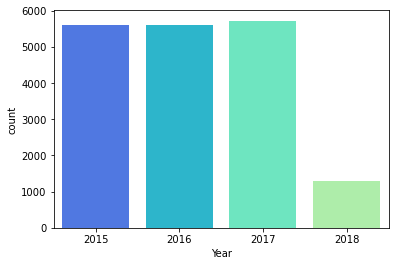

In [50]:
sns.countplot('Year',data=df3)

##### Comment - 
- **This dataset contains data from 2015 - 2018**
- **Maximum sales year is 2017**
- **Least sales year is 2018**

##### Approach - 
- **Check average price over each month.**
- **Check sales entry per month.**
- **Using countplot we will fing average price over each month.**

### Checking Month-wise sales

<AxesSubplot:xlabel='Month', ylabel='count'>

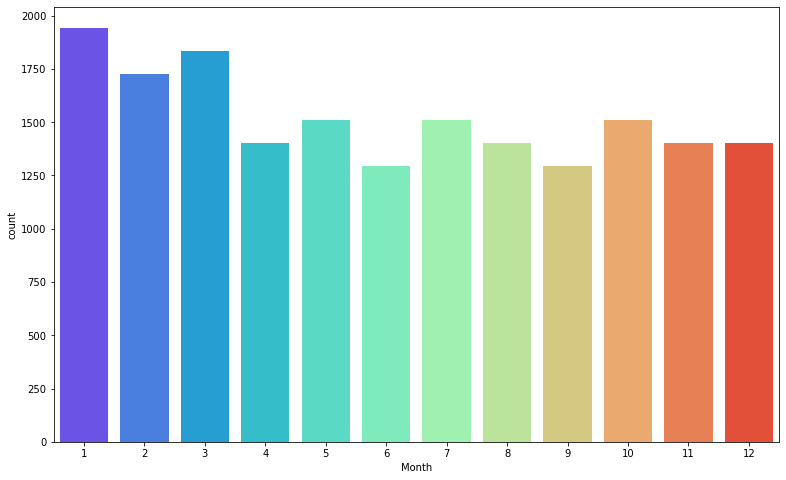

In [51]:
plt.figure(figsize=(13,8))
sns.countplot(x='Month' , data=df3,palette='rainbow')

In [52]:
df3['Month'].value_counts().max()

1944

In [53]:
df3['Month'].value_counts().min()

1294

##### Comment - 
- **Maximum sales comes in jan,feb and march months.**
- **Maximum sales demand of avacodo increases in month of jan(1994) and minimum in month of june.**

### Checking Month-wise Variation in AveragePrice

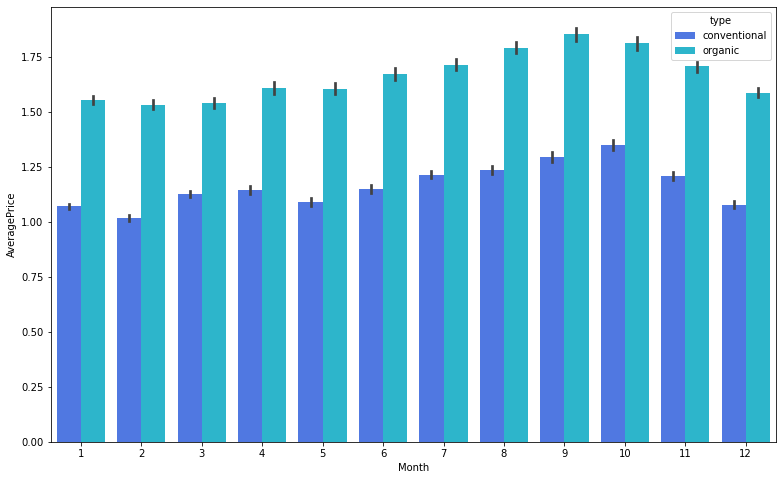

In [54]:
plt.figure(figsize=(13,8))
sns.barplot(x='Month' , y= 'AveragePrice', hue='type', data=df3)
plt.show()

In [55]:
df3.groupby(['Month','type'])['AveragePrice'].agg([np.mean]).T

Month           1                      2                      3             \
type  conventional   organic conventional   organic conventional   organic   
mean      1.069095  1.552942     1.017315  1.531458     1.126209  1.538301   

Month           4                     5             ...           8            \
type  conventional  organic conventional   organic  ... conventional  organic   
mean       1.14235  1.60641     1.089577  1.603624  ...     1.235399  1.78963   

Month           9                      10                     11            \
type  conventional   organic conventional   organic conventional   organic   
mean      1.294738  1.850571     1.349339  1.810026     1.206054  1.705071   

Month           12            
type  conventional   organic  
mean      1.077393  1.585193  

[1 rows x 24 columns]

<Figure size 720x720 with 0 Axes>

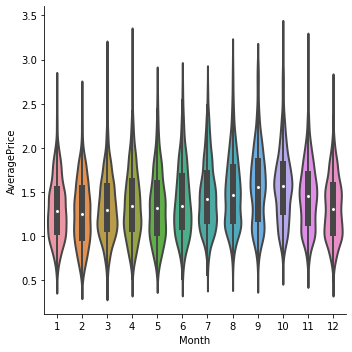

In [56]:
plt.figure(figsize=(10,10))
sns.catplot(x='Month' , y= 'AveragePrice', kind= 'violin', data=df3, linewidth=2)
plt.show()

##### Comment -
- **In month of September and October Price of Conventional type of Avacado is comparatively higher than other months.**
- **There is not much upheaval in Organic type Avacoda over year peroid.**
- **We can see that variation in mean price values in above groupby table, which confirm what we got from barplot.**
**But what causes such High demand in 1st quater of year ?**

*Simple Google gives answer 'FLAVOR'. Yes, Flavor!!!*

*Avocados are available year round like most agricultural commodities these days, but January through March is the best time of year for flavor . It is during this time that the fruit has developed higher oil content, resulting in that buttery flavor and texture that we all love.*

- **Now Let Compare Countplot of Sales Entries and Barplot of Avg Price Monthwise.**
- **In first sight we can see in period of Augest to October price high & in that same time period sales order are minimum.**
- **Opposite of it true in duration of Jan to March.**
- **This variation applicable to conventional type while we cannot find such any relation in case of Organic avacado.**


###### In conclusion when Average sale price of 'Conventional Avacado' is high in same time less sales order are observe. Inshort Customer are less interested in buying avacado at high Price.

### Exploring Region Feature

Text(0.5, 1.0, 'Bar Plot for regions')

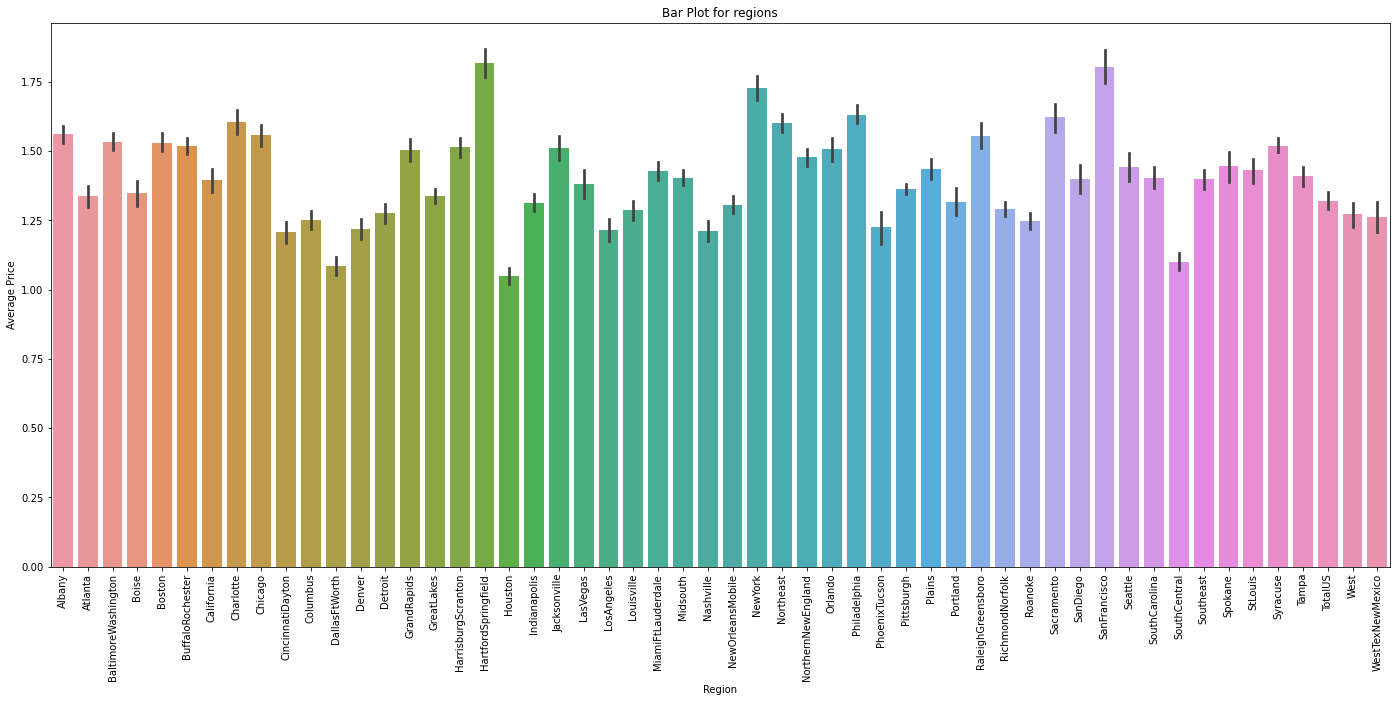

In [57]:
plt.figure(figsize=(24,10))
ax=sns.barplot(x=df['region'],y=df['AveragePrice'],data=df3)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title(f'Bar Plot for regions')

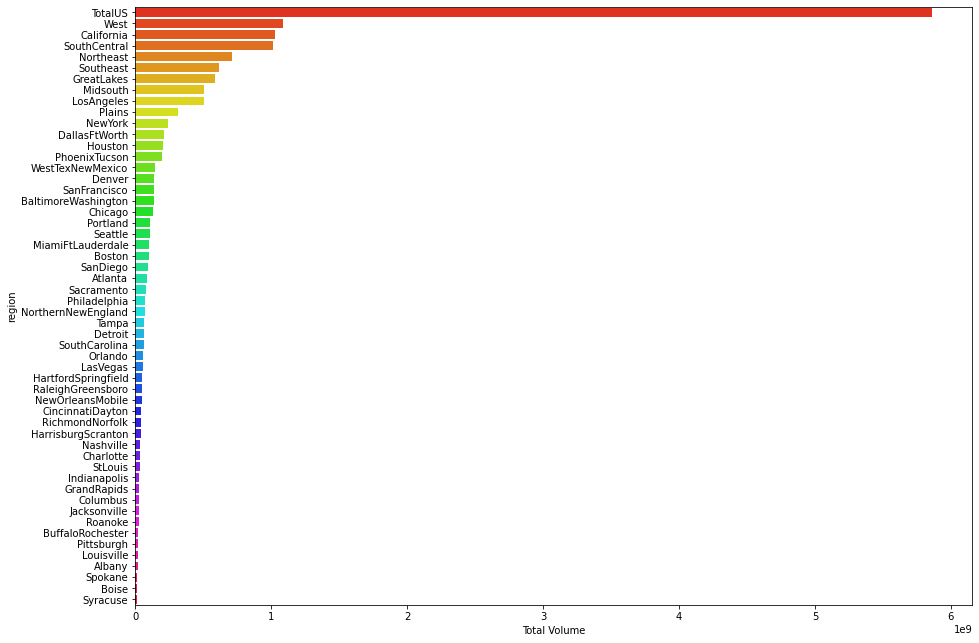

In [58]:
region =df.groupby('region')['Total Volume'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(15,11))
sns.barplot(x=region['Total Volume'],y=region['region'],data=df3,palette='hsv')
plt.show()

In [59]:
df.groupby(['region'])['Total Volume','AveragePrice','Total Bags','Small Bags','Large Bags','XLarge Bags'].agg([np.mean])

Total Volume AveragePrice    Total Bags    Small Bags  \
                             mean         mean          mean          mean   
region                                                                       
Albany               4.753787e+04     1.561036  7.929747e+03  6.647765e+03   
Atlanta              2.621453e+05     1.337959  8.449856e+04  5.160573e+04   
BaltimoreWashington  3.985619e+05     1.534231  1.044561e+05  1.009397e+05   
Boise                4.264257e+04     1.348136  1.597459e+04  1.384004e+04   
Boston               2.877929e+05     1.530888  6.359609e+04  5.890659e+04   
BuffaloRochester     6.793630e+04     1.516834  3.435134e+04  3.037998e+04   
California           3.044324e+06     1.395325  7.298290e+05  6.778038e+05   
Charlotte            1.051939e+05     1.606036  3.460930e+04  3.149069e+04   
Chicago              3.955690e+05     1.556775  4.989763e+04  4.377116e+04   
CincinnatiDayton     1.317219e+05     1.209201  6.182816e+04  1.675117e+04   
Columbus             8.873776e+04     1.252781  2.963428e+04  2.387808e+04   
DallasFtWorth        6.166251e+05     1.085592  1.374845e+05  1.207744e+05   
Denver               4.109542e+05     1.218580  1.744290e+05  5.551362e+04   
Detroit              1.876403e+05     1.276095  7.177534e+04  5.899134e+04   
GrandRapids          8.938383e+04     1.505000  2.712750e+04  2.228839e+04   
GreatLakes           1.744505e+06     1.338550  5.283303e+05  3.647559e+05   
HarrisburgScranton   1.236948e+05     1.513284  4.002738e+04  3.778956e+04   
HartfordSpringfield  1.499128e+05     1.818639  3.352962e+04  3.188923e+04   
Houston              6.010884e+05     1.047929  1.485653e+05  9.622831e+04   
Indianapolis         8.953666e+04     1.313994  3.544618e+04  1.955936e+04   
Jacksonville         8.517753e+04     1.510947  2.875186e+04  1.283961e+04   
LasVegas             1.608784e+05     1.380917  5.341122e+04  2.656102e+04   
LosAngeles           1.502653e+06     1.216006  4.978240e+05  4.607281e+05   
Louisville           4.762427e+04     1.286686  1.963103e+04  8.326157e+03   
MiamiFtLauderdale    2.889740e+05     1.428491  6.957527e+04  3.319519e+04   
Midsouth             1.503992e+06     1.404763  4.630581e+05  3.975279e+05   
Nashville            1.053612e+05     1.212101  3.836440e+04  2.971239e+04   
NewOrleansMobile     1.351927e+05     1.304793  4.221580e+04  3.508744e+04   
NewYork              7.122311e+05     1.727574  2.011661e+05  1.727860e+05   
Northeast            2.110299e+06     1.601923  5.828059e+05  5.136774e+05   
NorthernNewEngland   2.116358e+05     1.477396  4.113913e+04  3.336382e+04   
Orlando              1.735524e+05     1.506213  4.988651e+04  2.641384e+04   
Philadelphia         2.125408e+05     1.632130  7.063678e+04  6.336398e+04   
PhoenixTucson        5.788264e+05     1.224438  1.151131e+05  6.589535e+04   
Pittsburgh           5.564008e+04     1.364320  2.143628e+04  1.600053e+04   
Plains               9.206761e+05     1.436509  2.303172e+05  2.034338e+05   
Portland             3.270775e+05     1.317722  1.464626e+05  1.228066e+05   
RaleighGreensboro    1.426116e+05     1.555118  4.638070e+04  4.449847e+04   
RichmondNorfolk      1.249433e+05     1.291331  3.700659e+04  3.448670e+04   
Roanoke              7.408879e+04     1.247929  2.837570e+04  2.501876e+04   
Sacramento           2.223779e+05     1.621568  2.657476e+04  2.573030e+04   
SanDiego             2.656566e+05     1.398166  6.906115e+04  5.998754e+04   
SanFrancisco         4.018645e+05     1.804201  4.405599e+04  4.290636e+04   
Seattle              3.231189e+05     1.442574  1.499746e+05  1.255833e+05   
SouthCarolina        1.797449e+05     1.403284  5.370761e+04  3.968446e+04   
SouthCentral         2.991952e+06     1.101243  6.905102e+05  5.467914e+05   
Southeast            1.820232e+06     1.398018  5.370640e+05  3.162819e+05   
Spokane              4.605111e+04     1.445592  1.850407e+04  1.588258e+04   
StLouis              9.489004e+04     1.430

##### Comment - Feature Region
- **Maximum sales volume is in South Central while Minimum Sales volume is in syracuse.**
- **Maximum average price is in SanFrancciso and Minimum average sale is in Houston.**

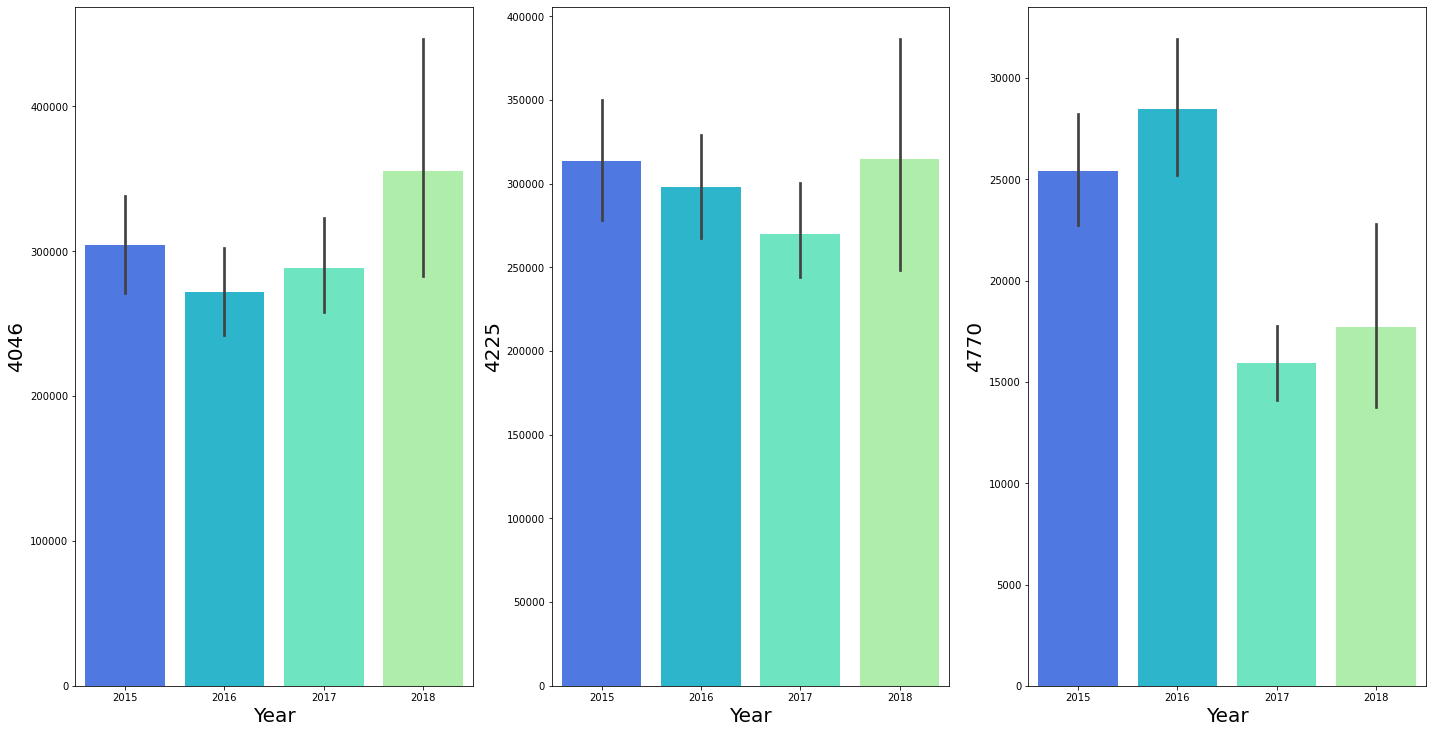

In [60]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber =1
Y = df[['4046','4225','4770']]
X = df['year']
for col in Y:
    if plotnumber <=9:
        plt.subplot(3,3,plotnumber)
        sns.barplot(X,Y[col])
        plt.xlabel('Year',fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()

###### **Production of PLU 4046 has grown over the 4 years and is greater than the production of PLU 4225 and PLU 4770,which is least produced.

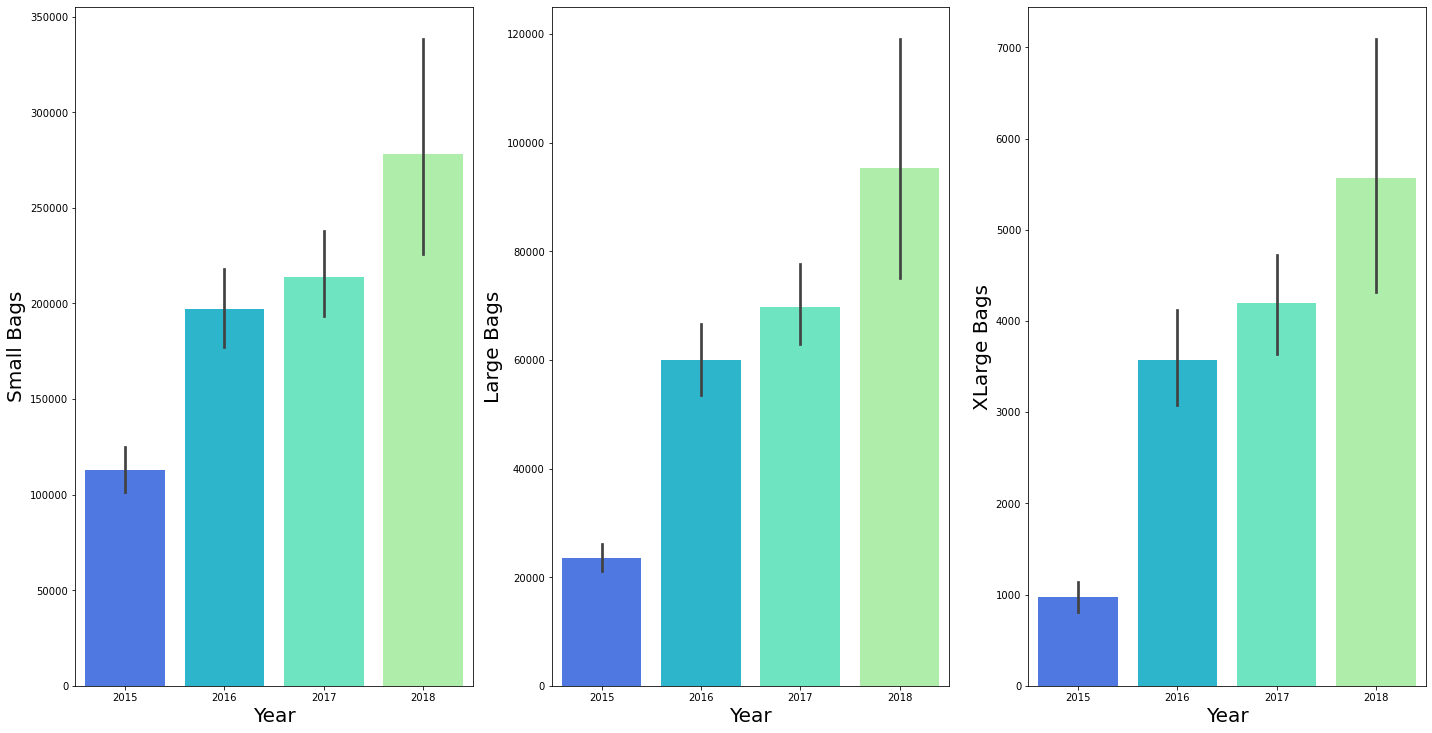

In [61]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber =1
y = df[['Small Bags','Large Bags','XLarge Bags']]
X = df['year']
for col in y:
    if plotnumber <=9:
        plt.subplot(3,3,plotnumber)
        sns.barplot(X,y[col])
        plt.xlabel('Year',fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()

##### Comment -  
- **Sale of all 3 types of bags grown over years.**
- **Most customers prefer buying Small Bags over Large and XLarge Bags.**
- **There is very less customer segment who are willing to XLarge bags possibly due to buying more quantity ,need eo conssume and price associated with it.**

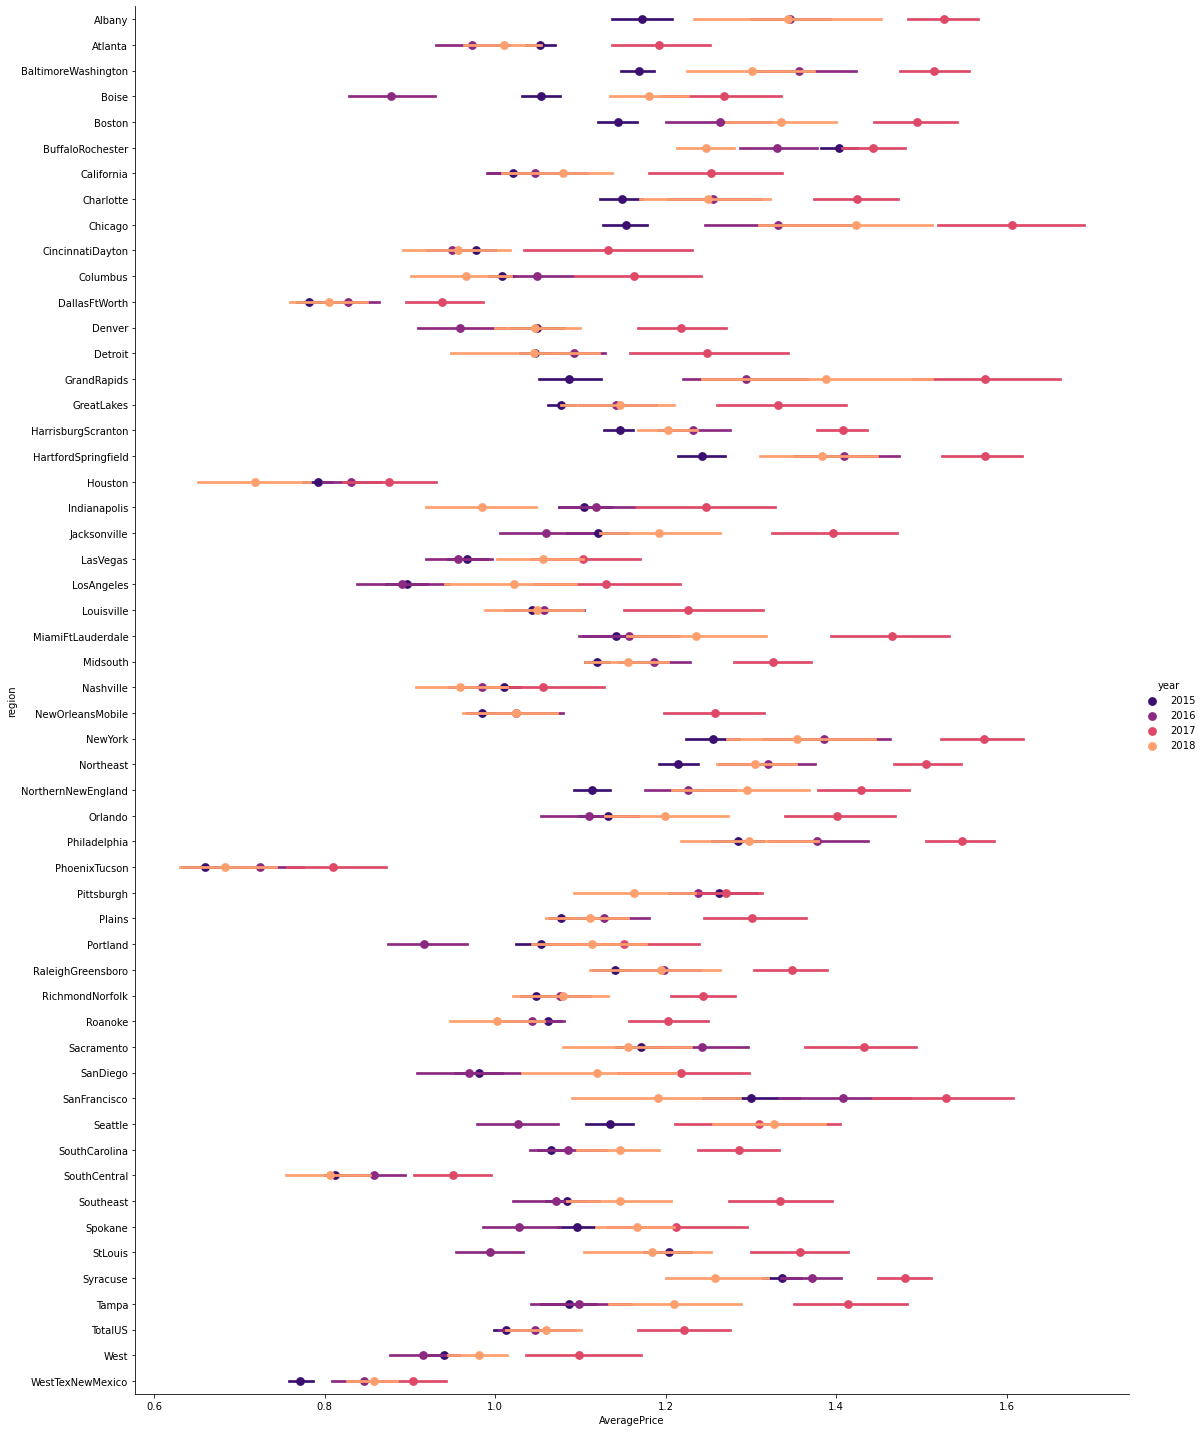

In [62]:
mask = df['type']=='conventional'
w = sns.factorplot('AveragePrice','region',data=df[mask],
                  hue='year',
                  size=20,
                  aspect=0.8,
                  palette='magma',
                  join=False,
                  )

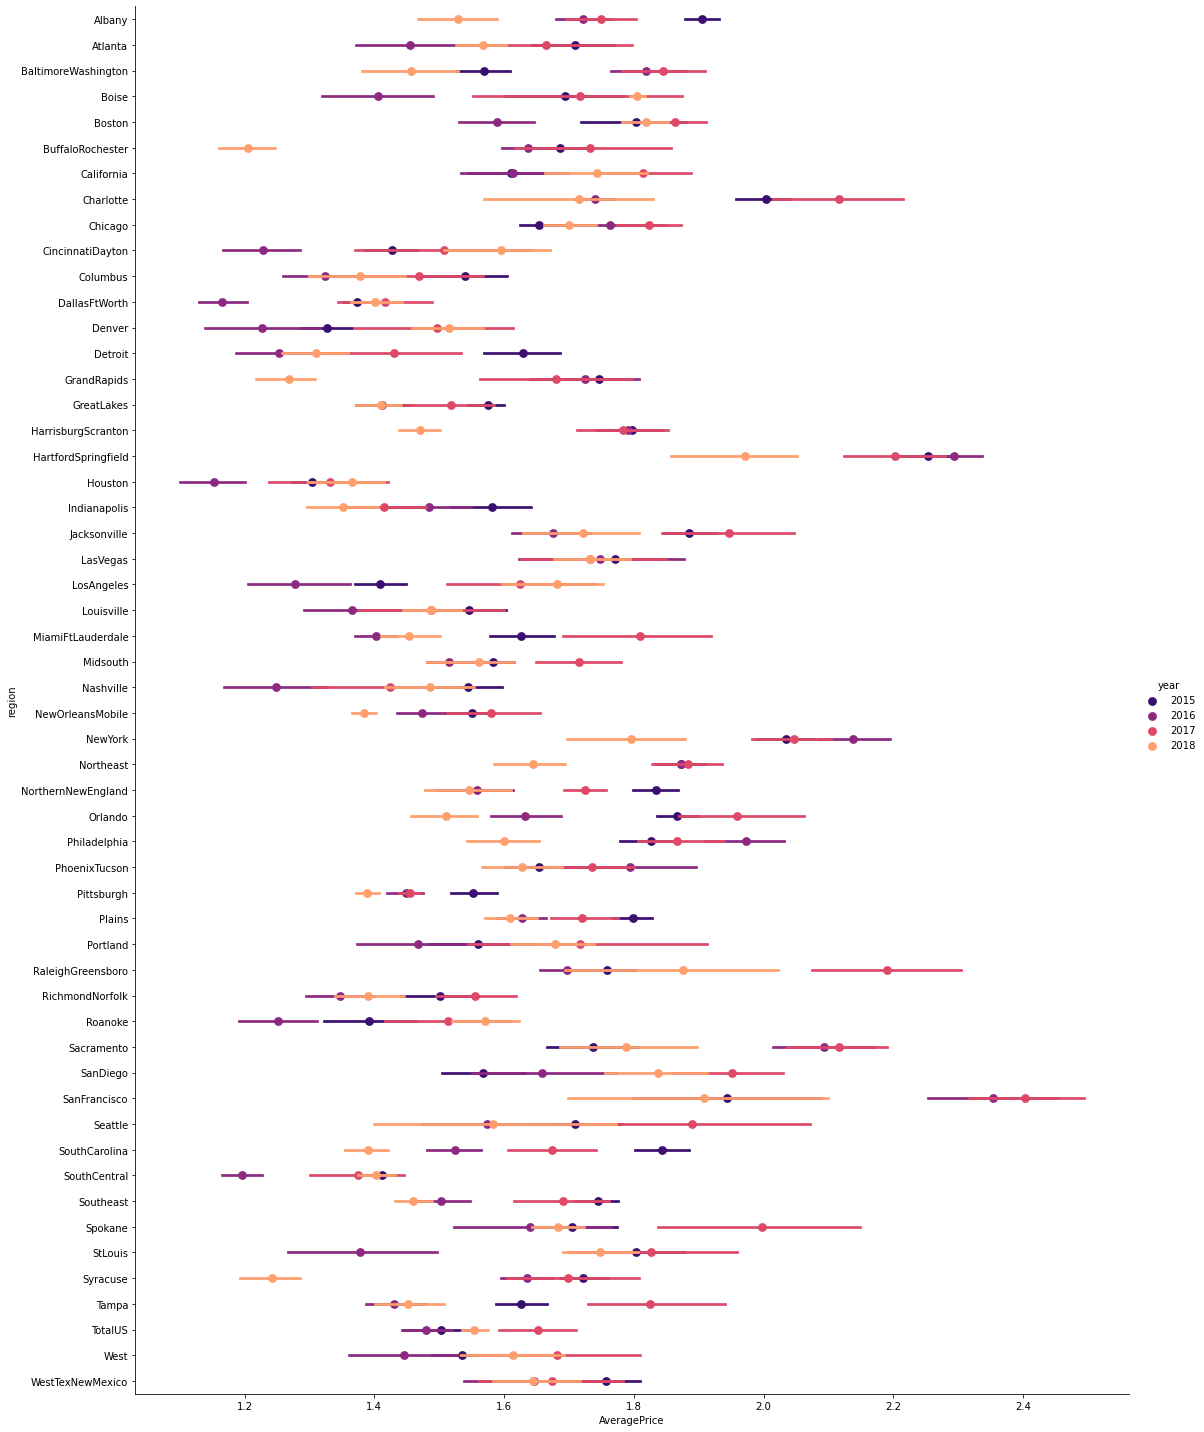

In [63]:
mask = df['type']=='organic'
w = sns.factorplot('AveragePrice','region',data=df[mask],
                  hue='year',
                  size=20,
                  aspect=0.8,
                  palette='magma',
                  join=False,
                  )

##### Comment - The average price of the avacodo is high in region SanFrancisco followed by RleighGreensboro in the year 2017. The demand of the fruit is high and price is also high in the year 2017.

### Pairplot

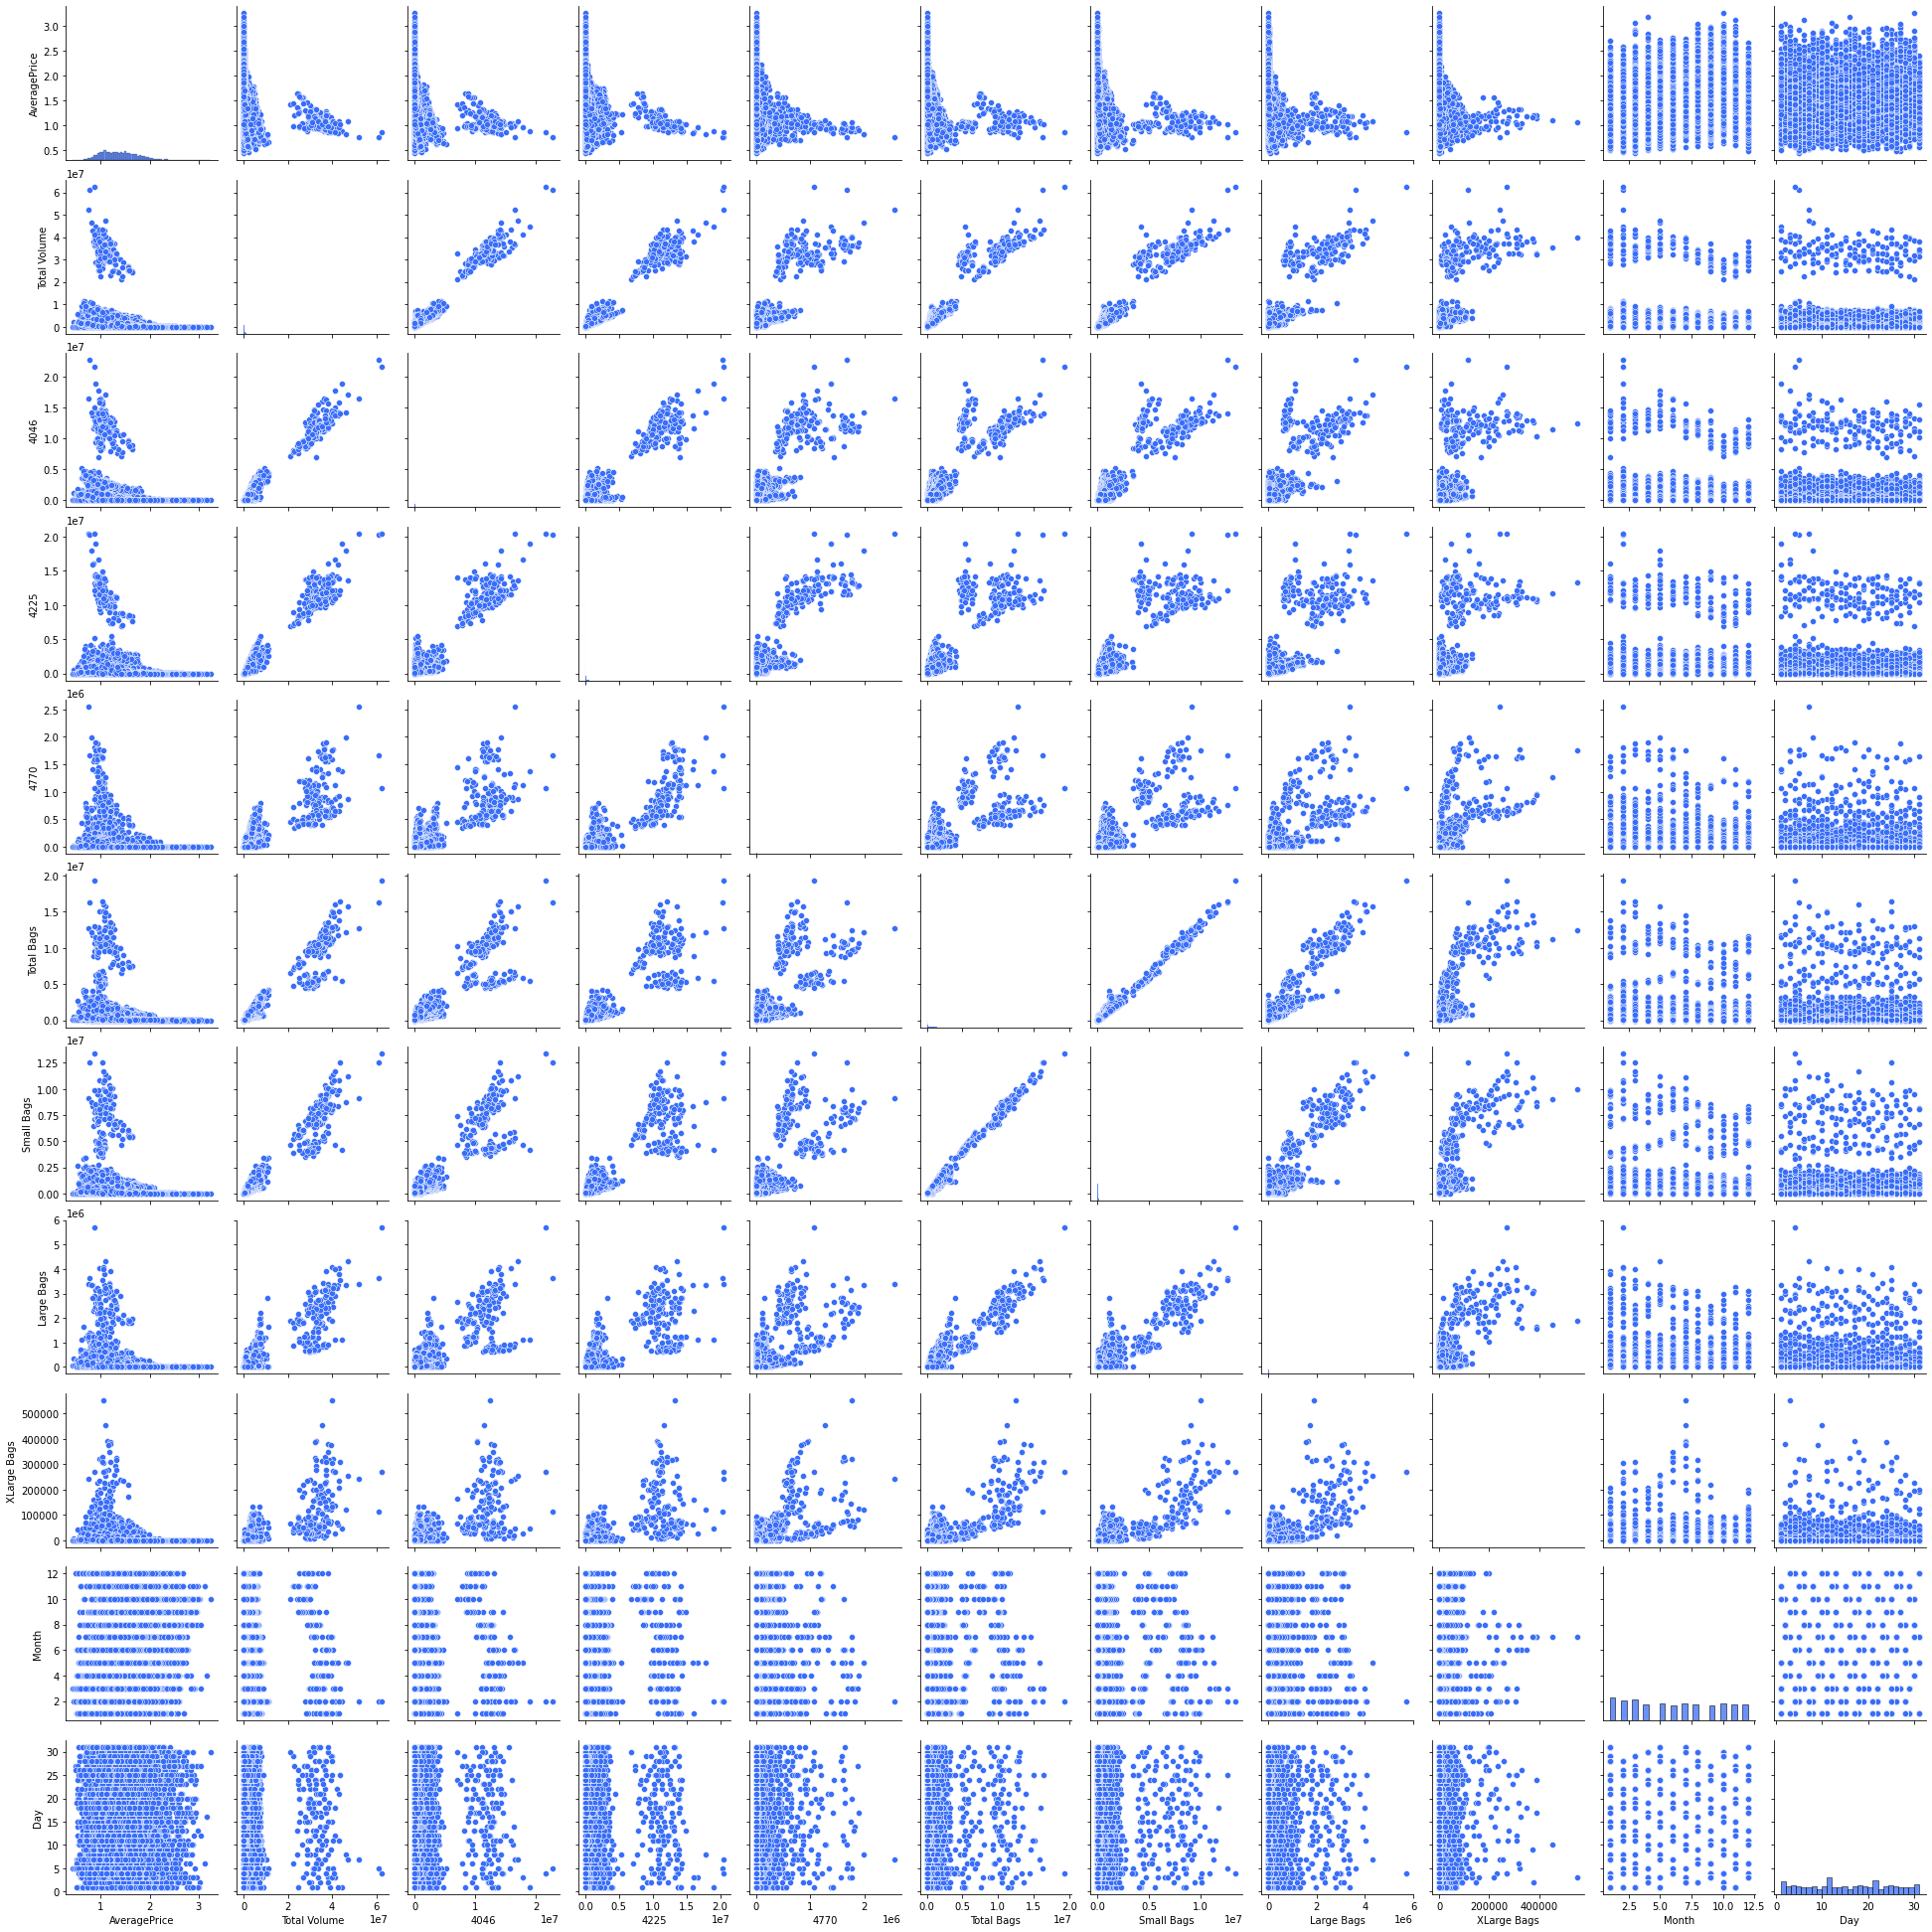

In [64]:
sns.pairplot(df2)

### Encoding Categorical Data

In [65]:
#using Label Encoder on target variable 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df3['region']=le.fit_transform(df3['region'])
df3['type']=le.fit_transform(df3['type'])
df3.head()

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags  type  region  Year  Month  
0     8603.62       93.25          0.0     0       0  2015     12  
1     9408.07       97.49          0.0     0       0  2015     12  
2     8042.21      103.14          0.0     0       0  2015     12  
3     5677.40      133.76          0.0     0       0  2015     12  
4     5986.26      197.69          0.0     0       0  2015     11

### Outliers Detection and Removal

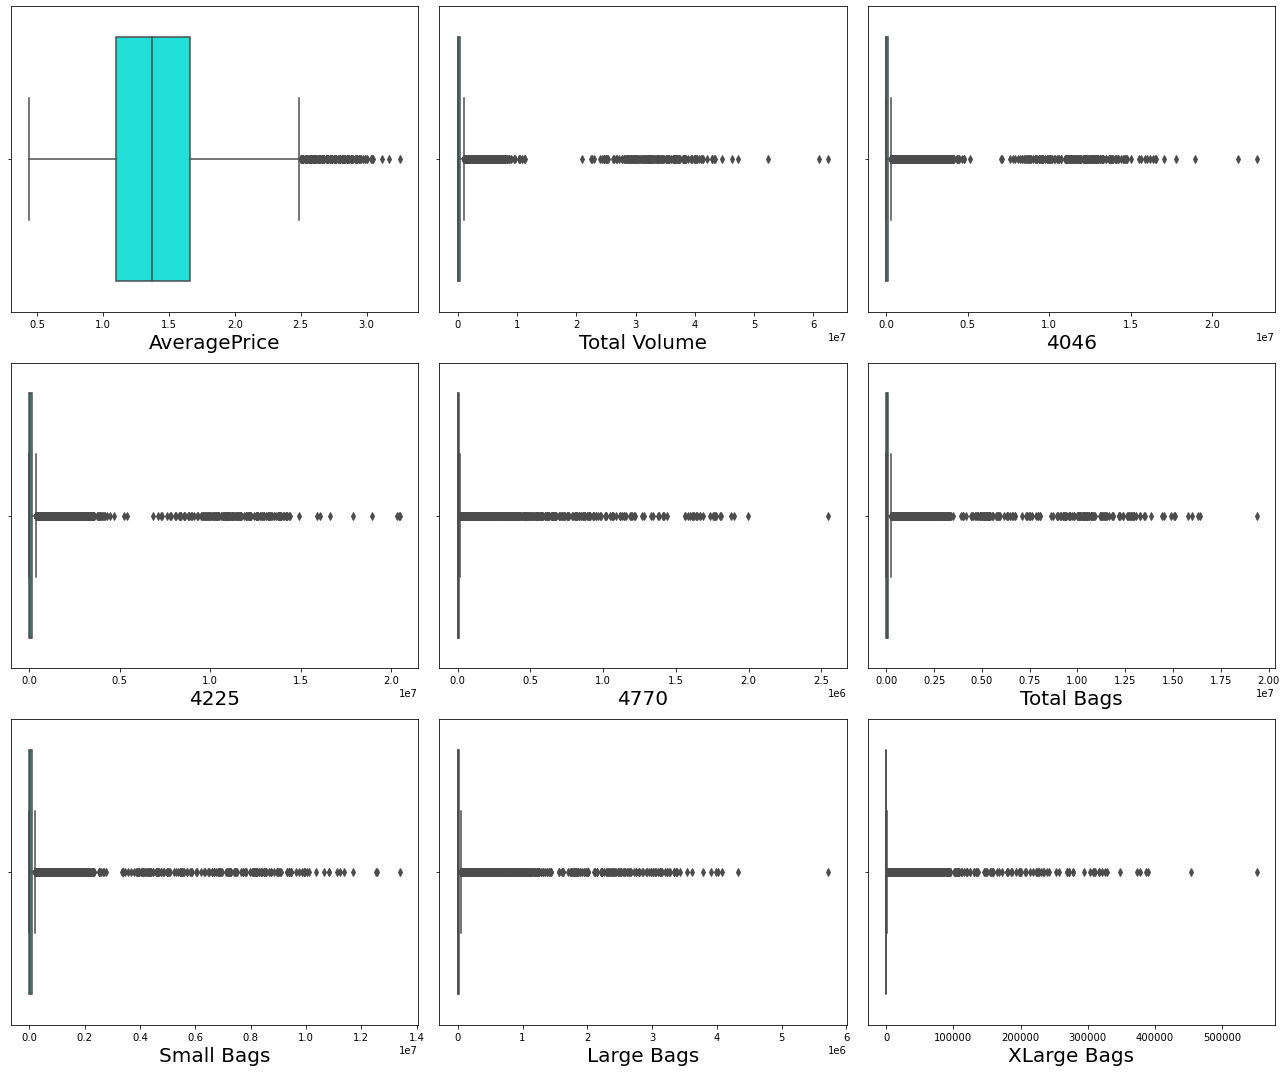

In [66]:
plt.figure(figsize=(18,15), facecolor='white')
plotnumber =1
for column in df2:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(df2[column], palette='hsv')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [67]:
from scipy.stats import zscore
z = np.abs(zscore(df3))
threshold = 3
df4 = df3[(z<3).all(axis = 1)]

In [68]:
print("\033[1m"+'Shape of dataset after removing outliers :'+"\033[0m",df4.shape)

Shape of dataset after removing outliers : (17651, 13)


- ###### Data Loss 

In [69]:
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((18249-17651)/18249)*100,'%')

Percentage Data Loss : 3.276891884486821 %


### Correlation

In [70]:
df4.corr()

AveragePrice  Total Volume      4046      4225      4770  \
AveragePrice      1.000000     -0.332056 -0.333577 -0.243988 -0.243465   
Total Volume     -0.332056      1.000000  0.876307  0.871592  0.647518   
4046             -0.333577      0.876307  1.000000  0.565118  0.492127   
4225             -0.243988      0.871592  0.565118  1.000000  0.620221   
4770             -0.243465      0.647518  0.492127  0.620221  1.000000   
Total Bags       -0.297323      0.912184  0.727981  0.757786  0.557980   
Small Bags       -0.275771      0.905648  0.706800  0.778761  0.571512   
Large Bags       -0.270915      0.640642  0.561060  0.451711  0.323747   
XLarge Bags      -0.152669      0.513741  0.415432  0.392030  0.495976   
type              0.613150     -0.415476 -0.341376 -0.383138 -0.321809   
region           -0.003242      0.076676  0.119067  0.011002 -0.095972   
Year              0.091704     -0.004866 -0.034636 -0.040234 -0.082054   
Month             0.149502     -0.018645 -0.015797 -0.019844 -0.027245   

              Total Bags  Small Bags  Large Bags  XLarge Bags      type  \
AveragePrice   -0.297323   -0.275771   -0.270915    -0.152669  0.613150   
Total Volume    0.912184    0.905648    0.640642     0.513741 -0.415476   
4046            0.727981    0.706800    0.561060     0.415432 -0.341376   
4225            0.757786    0.778761    0.451711     0.392030 -0.383138   
4770            0.557980    0.571512    0.323747     0.495976 -0.321809   
Total Bags      1.000000    0.978213    0.746946     0.581690 -0.378205   
Small Bags      0.978213    1.000000    0.593155     0.597700 -0.367593   
Large Bags      0.746946    0.593155    1.000000     0.296864 -0.286813   
XLarge Bags     0.581690    0.597700    0.296864     1.000000 -0.263734   
type           -0.378205   -0.367593   -0.286813    -0.263734  1.000000   
region          0.085892    0.065976    0.127635    -0.044338  0.018409   
Year            0.103442    0.086639    0.119543     0.108209  0.003867   
Month          -0.010916   -0.013018   -0.001457     0.002843 -0.009499   

                region      Year     Month  
AveragePrice -0.003242  0.091704  0.149502  
Total Volume  0.076676 -0.004866 -0.018645  
4046          0.119067 -0.034636 -0.015797  
4225          0.011002 -0.040234 -0.019844  
4770         -0.095972 -0.082054 -0.027245  
Total Bags    0.085892  0.103442 -0.010916  
Small Bags    0.065976  0.086639 -0.013018  
Large Bags    0.127635  0.119543 -0.001457  
XLarge Bags  -0.044338  0.108209  0.002843  
type          0.018409  0.003867 -0.009499  
region        1.000000 -0.004417  0.000119  
Year         -0.004417  1.000000 -0.175287  
Month         0.000119 -0.175287  1.000000

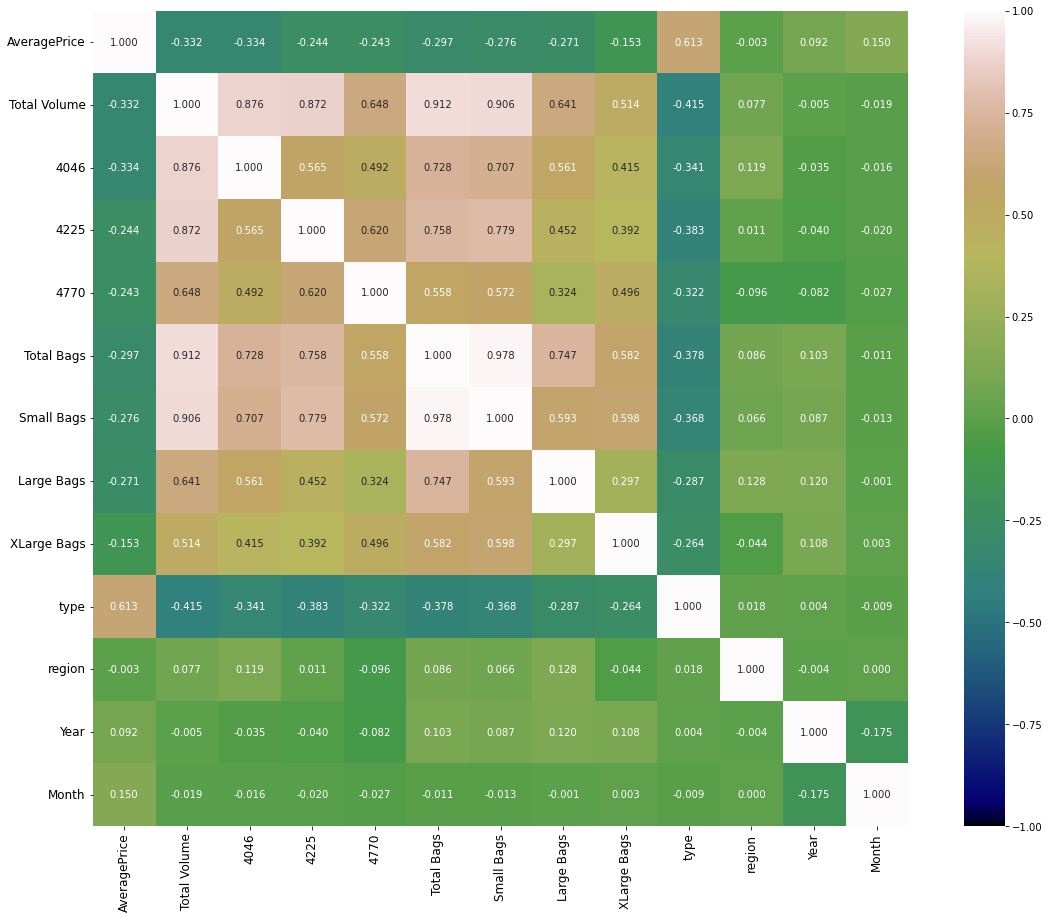

In [71]:
plt.figure(figsize=(20,15))
sns.heatmap(df4.corr(), vmin=-1, vmax=1, annot=True,square=True, fmt='0.3f', annot_kws={'size':10},  cmap='gist_earth')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

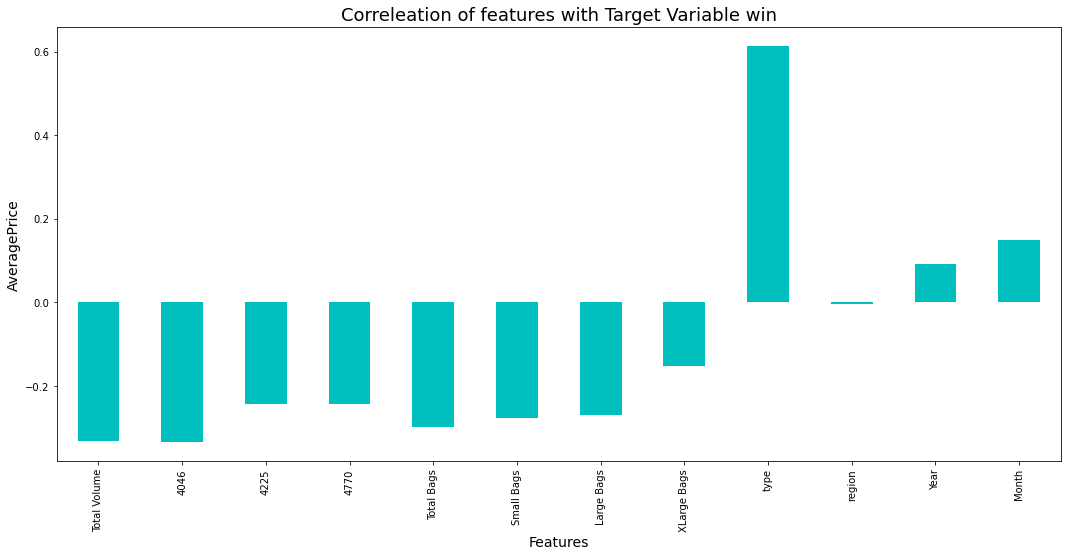

In [72]:
plt.figure(figsize=(18,8))
df4.corr()['AveragePrice'].drop(['AveragePrice']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('AveragePrice',fontsize=14)
plt.title('Correleation of features with Target Variable win',fontsize=18)
plt.show()

In [73]:
df4.head()

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags  type  region  Year  Month  
0     8603.62       93.25          0.0     0       0  2015     12  
1     9408.07       97.49          0.0     0       0  2015     12  
2     8042.21      103.14          0.0     0       0  2015     12  
3     5677.40      133.76          0.0     0       0  2015     12  
4     5986.26      197.69          0.0     0       0  2015     11

##### Almost all features are highly negatively correlated with the target variable and only type,year,month have positive correlation with the target.

- **Small bags are highly correlated with Total Bags correlation coeffient 0.978. It is natural as most of bags are small.**

- **Total volume is highly correleated 4046.**

##### Comment - We are going to remove some of columns which are not reqire for further analysis


- **4046,4225,4770 are shows multicollinearity with Total Volume. These feature are nothing but Total avacado sold under particular grade, which are already counted in Total Volume. As we do not have any price data according each grade of avacado. These feature doesnot have any meaning in ML model.So gone drop them.**

- **Same goes with Total bags. Total bags is sum of all other type of bags. We gone keep drop Total bags and going to keep other differnt size bags counts features.**
- **Next is region feature, we also going drop this as it very poorly correlated with other features.**

In [74]:
df4.drop(columns=['4046','4225','4770','region','Total Bags'],axis=1, inplace=True)

### Checking Multicollinearity between features using variance_inflation_factor

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(df4.values,i)for i in range(df4.shape[1])]
vif['Features']=df4.columns
vif

VIF      Features
0  24.367038  AveragePrice
1   7.754106  Total Volume
2   7.707277    Small Bags
3   1.970395    Large Bags
4   1.693456   XLarge Bags
5   3.643636          type
6  19.857116          Year
7   4.212261         Month

#### Strategy to remove multicollinearity:

1. **Removing some highly correlated features.but this will not work here as most of input features are correlated with each other either moderated or poorly.**
2. **Standard scaling and then apply PCA**



###### We will go by first way for further investigation. As For Independent feature VIF is within limit of 10 except year.
**we will drop year as it is less than 20% correlated with target variable and for most input features correlated with less than 10%.**

In [76]:
df4.drop(columns=['Year'],axis=1,inplace=True)

### Checking correlation with target variable after removal of Multicollinearity

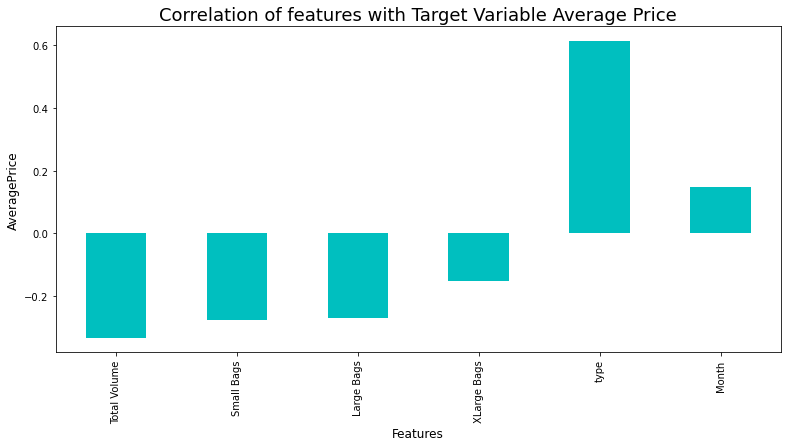

In [77]:
plt.figure(figsize = (13,6))
df4.corr()['AveragePrice'].drop(['AveragePrice']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=12)
plt.ylabel('AveragePrice',fontsize=12)
plt.title('Correlation of features with Target Variable Average Price',fontsize = 18)
plt.show()

## Skewness Of Features

In [78]:
df4.skew()

AveragePrice    0.377432
Total Volume    3.767138
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
Month           0.107408
dtype: float64

### Transforming skewness through log transform

In [79]:
for col in df4.columns:
    if df4.skew().loc[col]>0.55:
        df4[col]=np.log1p(df4[col])

### Standard Scaling

In [80]:
X = df4.drop('AveragePrice', axis=1)
Y = df4['AveragePrice']

In [81]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

## Machine Learning Model Building

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=42, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (12355, 6)
Training target vector size: (12355,)
Test feature matrix size: (5296, 6)
Test target vector size: (5296,)


In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.33)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.46995615775000343 on Random_state 557


## Linear Regression : Base Model

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.33)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted :'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual :'+'\033[0m\n',Y_test)

Predicted :
 [1.12475471 1.12271865 1.15279805 ... 1.49133594 1.65205149 1.20813429]


Actual :
 2313     1.05
1117     1.05
8258     1.71
1738     0.77
16040    2.02
         ... 
13197    1.36
12390    1.50
14660    1.85
12940    1.67
5999     1.77
Name: AveragePrice, Length: 5825, dtype: float64


### Linear Regression Evaluation Matrix

In [86]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

 Error :
Mean absolute error : 0.2279549819155831
Mean squared error : 0.08358464483815384
Root Mean Squared Error: 0.28911009120775055


 R2 Score :
0.45380097379202466


#### Cross Validation

In [87]:
from sklearn.model_selection import cross_val_score
# Cross Validation
score = cross_val_score(lin_reg, X_scale, Y, cv =5)
print('\033[1m'+'Cross Validation Score :',lin_reg,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())

Cross Validation Score : LinearRegression() :

Mean CV Score : -0.013708960907187184


### Applying other Regression Model, Evaluation & Crossvalidation

In [89]:
rf = RandomForestRegressor(n_estimators = 250 ,max_depth=6)
svr=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
dtc = DecisionTreeRegressor(criterion='mse')
adb=AdaBoostRegressor(learning_rate=0.1)
gradb=GradientBoostingRegressor( max_depth=6,learning_rate=0.1)
knn=KNeighborsRegressor(n_neighbors=4,algorithm='kd_tree')
ls= Lasso(alpha=1e-2, normalize=True, max_iter=1e5)
rd=Ridge(alpha=1e-2, normalize=True)
xgb=XGBRegressor()
model = [rf,ls,rd,svr,dtc,adb,gradb,knn,xgb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    print('==============================================================================================================')



 Error of  RandomForestRegressor(max_depth=6, n_estimators=250) :
Mean absolute error : 0.20216809247803091
Mean squared error : 0.06765087520841677
Root Mean Squared Error: 0.260097818538366


 R2 Score :
0.5579230822538881


 Error of  Lasso(alpha=0.01, max_iter=100000.0, normalize=True) :
Mean absolute error : 0.3194414548869916
Mean squared error : 0.15304237372366247
Root Mean Squared Error: 0.39120630583320415


 R2 Score :
-8.31571191228786e-05


 Error of  Ridge(alpha=0.01, normalize=True) :
Mean absolute error : 0.2279861387774805
Mean squared error : 0.08357917659516231
Root Mean Squared Error: 0.28910063402760344


 R2 Score :
0.45383670701793977


 Error of  SVR(epsilon=0.2, gamma='auto', kernel='poly') :
Mean absolute error : 0.21527871533867446
Mean squared error : 0.07549508722263167
Root Mean Squared Error: 0.27476369342151385


 R2 Score :
0.5066636556949884


 Error of  DecisionTreeRegressor() :
Mean absolute error : 0.21535965665236048
Mean squared error : 0.097490

In [90]:
model = [rf,ls,rd,svr,dtc,adb,gradb,knn,xgb]
    # Cross Validation
for m in model:    
    score = cross_val_score(m, X_scale, Y, cv =4)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean CV Score :",score.mean())
    print('==============================================================================================================')



Cross Validation Score : RandomForestRegressor(max_depth=6, n_estimators=250) :

Mean CV Score : -0.16648993174421817


Cross Validation Score : Lasso(alpha=0.01, max_iter=100000.0, normalize=True) :

Mean CV Score : -1.446214478704042


Cross Validation Score : Ridge(alpha=0.01, normalize=True) :

Mean CV Score : -0.10086441226343865


Cross Validation Score : SVR(epsilon=0.2, gamma='auto', kernel='poly') :

Mean CV Score : -0.18208704421189129


Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : -0.95133473842968


Cross Validation Score : AdaBoostRegressor(learning_rate=0.1) :

Mean CV Score : -0.13115940146059166


Cross Validation Score : GradientBoostingRegressor(max_depth=6) :

Mean CV Score : -0.2745850972827094


Cross Validation Score : KNeighborsRegressor(algorithm='kd_tree', n_neighbors=4) :

Mean CV Score : -0.47491144454562656


Cross Validation Score : XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, cols

### Among all Model RandomForestRegressor  gave us maximum R2 score of 0.66. So We will perform Hyper Parameter Tuning on  RandomForestRegressor.

### Hyper Parameter Tuning : GridSearchCV

In [105]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [106]:
parameter = {'n_estimators':[30,60,80],'max_depth': [10,20,40],
             'min_samples_leaf':[5,10],'criterion':['mse','mae'],
             'max_features':["auto","sqrt","log2"]}

In [109]:
GCV = GridSearchCV( RandomForestRegressor(),parameter,cv=5,n_jobs = -1,verbose = 3)

In [ ]:
GCV.fit(X_train,Y_train)

### Final Model

In [111]:
from sklearn.ensemble import RandomForestRegressor
Final_mod =  RandomForestRegressor(n_estimators=60 ,criterion = 'mse', max_depth= 20, max_features = 'auto',
             min_samples_leaf = 5, min_samples_split = 10)
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 0.1707056976778568
Mean squared error : 0.05166230400463425
Root Mean Squared Error: 0.2272934315034956


 R2 Score of Final Model :
0.662403301543838




 True Values Vs Predicted Value plot :


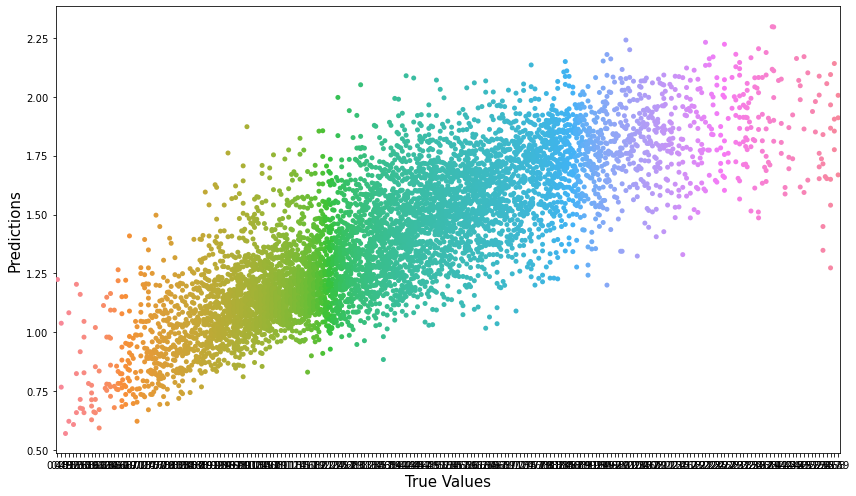

In [112]:
plt.figure(figsize=(12,7))
y_pred=Final_mod.predict(X_test)
sns.swarmplot(Y_test.round(2), y_pred)
print('\033[1m'+' True Values Vs Predicted Value plot :' +'\033[0m')
plt.xlabel('True Values' , fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()

### Saving model

In [113]:
import joblib
joblib.dump(Final_mod,'Avacado_Final.pkl')

['Avacado_Final.pkl']

***